### EDA of Neurons and Predicting their Total Surface Area based on different Features

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import random
import statistics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectFromModel



### Loading first group of neurons as Pandas Dataframe 

In [2]:
n_1 = pd.read_csv("neurons_group_1.csv")

#### Inspecting 1st group of neurons

In [3]:
n_1.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240


In [4]:
n_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                311 non-null    int64  
 1   average_diameter  311 non-null    float64
 2   overall_depth     311 non-null    float64
 3   overall_height    311 non-null    float64
 4   overall_width     311 non-null    float64
 5   soma_surface      311 non-null    float64
 6   total_length      311 non-null    float64
 7   total_surface     311 non-null    float64
 8   total_volume      311 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 22.0 KB


In [5]:
n_1.isna().sum()

id                  0
average_diameter    0
overall_depth       0
overall_height      0
overall_width       0
soma_surface        0
total_length        0
total_surface       0
total_volume        0
dtype: int64

In [6]:
n_1_numerical=n_1.drop("id",axis='columns')

* This dataset contains 9 measurements of 311 neurons. Out of these 9 measurements, 8 are actual morphological measurements and the first one, viz., ***id*** is a unique identifier for each neuron.

* All the morphological features are measured in 
   * ***microns***(for lengths)
   * ***square microns***(for areas)
   * ***cubic microns***(for volume)

* The eight morphological features are as follows
   * ***average_diameter*** - Average Diameter of the neuron 
   * ***overall_depth*** - Overall depth of the neuron
   * ***overall_height*** - Overall height of the neuron
   * ***overall_width*** - Overall width of the neuron
   * ***soma_surface*** -  Soma surface of the neuron (main part of the neuron)
   * ***total_length*** - Total length of the neuron
   * ***total_surface*** - Total surface area of the neuron
   * ***total_volume*** - Total volume of the neuron 

* We also observe that there are no missing values in our dataset


### EDA of 1st Neuron Group dataset using numerical and graphical methods

In [7]:
n_1_numerical.describe()

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.421175,91.967024,523.516774,320.548089,361.849689,3792.940198,5492.737135,808.488483
std,0.159435,35.658760,299.256684,124.039953,253.912293,2775.993259,5719.713426,1190.466808
min,0.053899,22.680000,82.836871,49.173247,2.895610,251.987893,402.242787,4.309842
25%,0.322128,64.574450,328.964661,233.480547,176.194233,2237.031837,2253.626506,197.071679
50%,0.415613,86.212200,469.151885,291.532148,311.568275,2946.858866,3636.755377,407.180171
75%,0.527572,115.566350,651.885452,392.534334,478.796933,4085.692910,5895.663836,833.681728
max,1.156730,183.960000,1928.118350,827.752239,1283.720986,15697.415190,37182.284100,8482.061401


**The different measures of our features are as follows:**
 * ***average_diameter*** - mean of 0.421175 with standard deviation of 0.159435
 * ***overall_depth*** - mean of 91.967024 with standard deviation of 35.658760
 * ***overall_height*** - mean of 523.516774 with standard deviation of 299.256684 
 * ***overall_width*** - mean of 320.548089 with standard deviation of 124.039953
 * ***soma_surface*** -  mean of 361.849689 with standard deviation of 253.912293
 * ***total_length*** - mean of 3792.940198 with standard deviation of 2775.993259
 * ***total_surface*** - mean of 5492.737135 with standard deviation of 5719.713426
 * ***total_volume*** - mean of 808.488483 with standard deviation of 1190.466808




<Axes: >

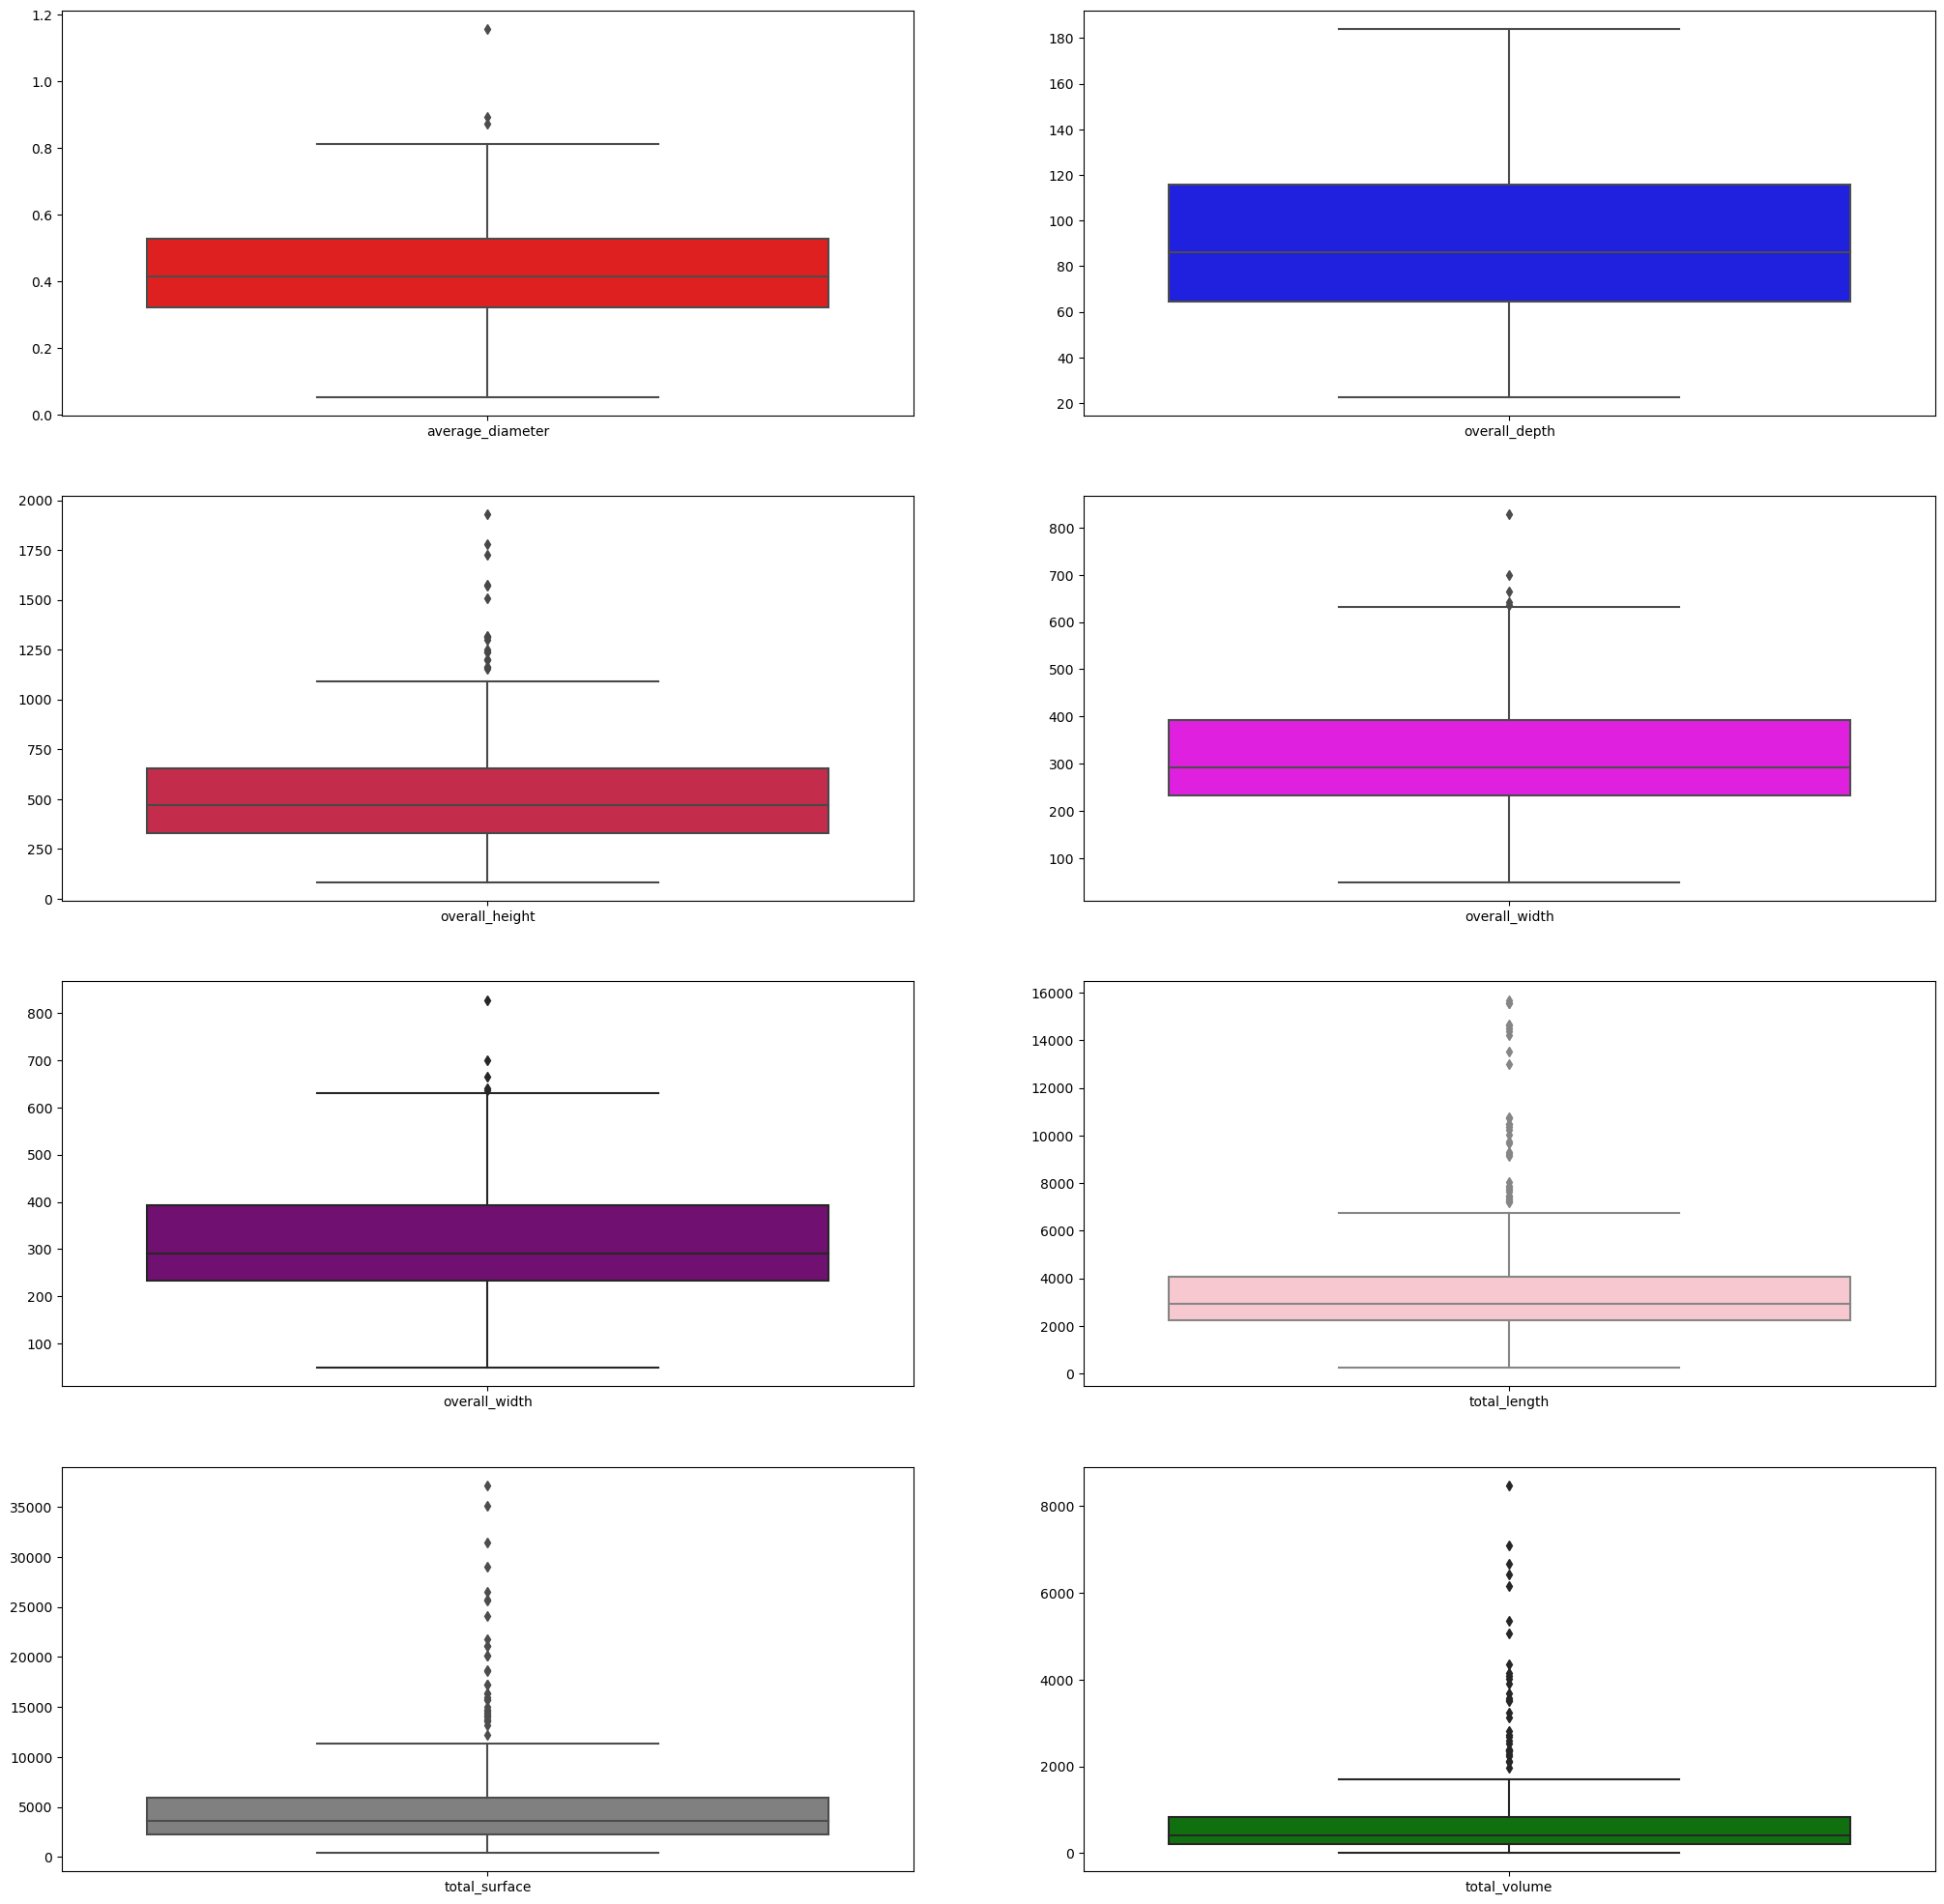

In [8]:
plt.figure(figsize=(25,25))
plt.subplot(4,2,1)
sns.boxplot(data=n_1_numerical[['average_diameter']], color='red')

plt.subplot(4,2,2)
sns.boxplot(data=n_1_numerical[['overall_depth']],color='blue')

plt.subplot(4,2,3)
sns.boxplot(data=n_1_numerical[['overall_height']],color='crimson')

plt.subplot(4,2,4)
sns.boxplot(data=n_1_numerical[['overall_width']],color='magenta')

plt.subplot(4,2,5)
sns.boxplot(data=n_1_numerical[['overall_width']],color='purple')

plt.subplot(4,2,6)
sns.boxplot(data=n_1_numerical[['total_length']],color='pink')

plt.subplot(4,2,7)
sns.boxplot(data=n_1_numerical[['total_surface']],color='grey')

plt.subplot(4,2,8)
sns.boxplot(data=n_1_numerical[['total_volume']],color='green')

* From the boxplots, it is evident that except for ***overall_depth***, all features have a certain degree of skewness due to presence of outliers.

Text(0, 0.5, 'Number of neurons')

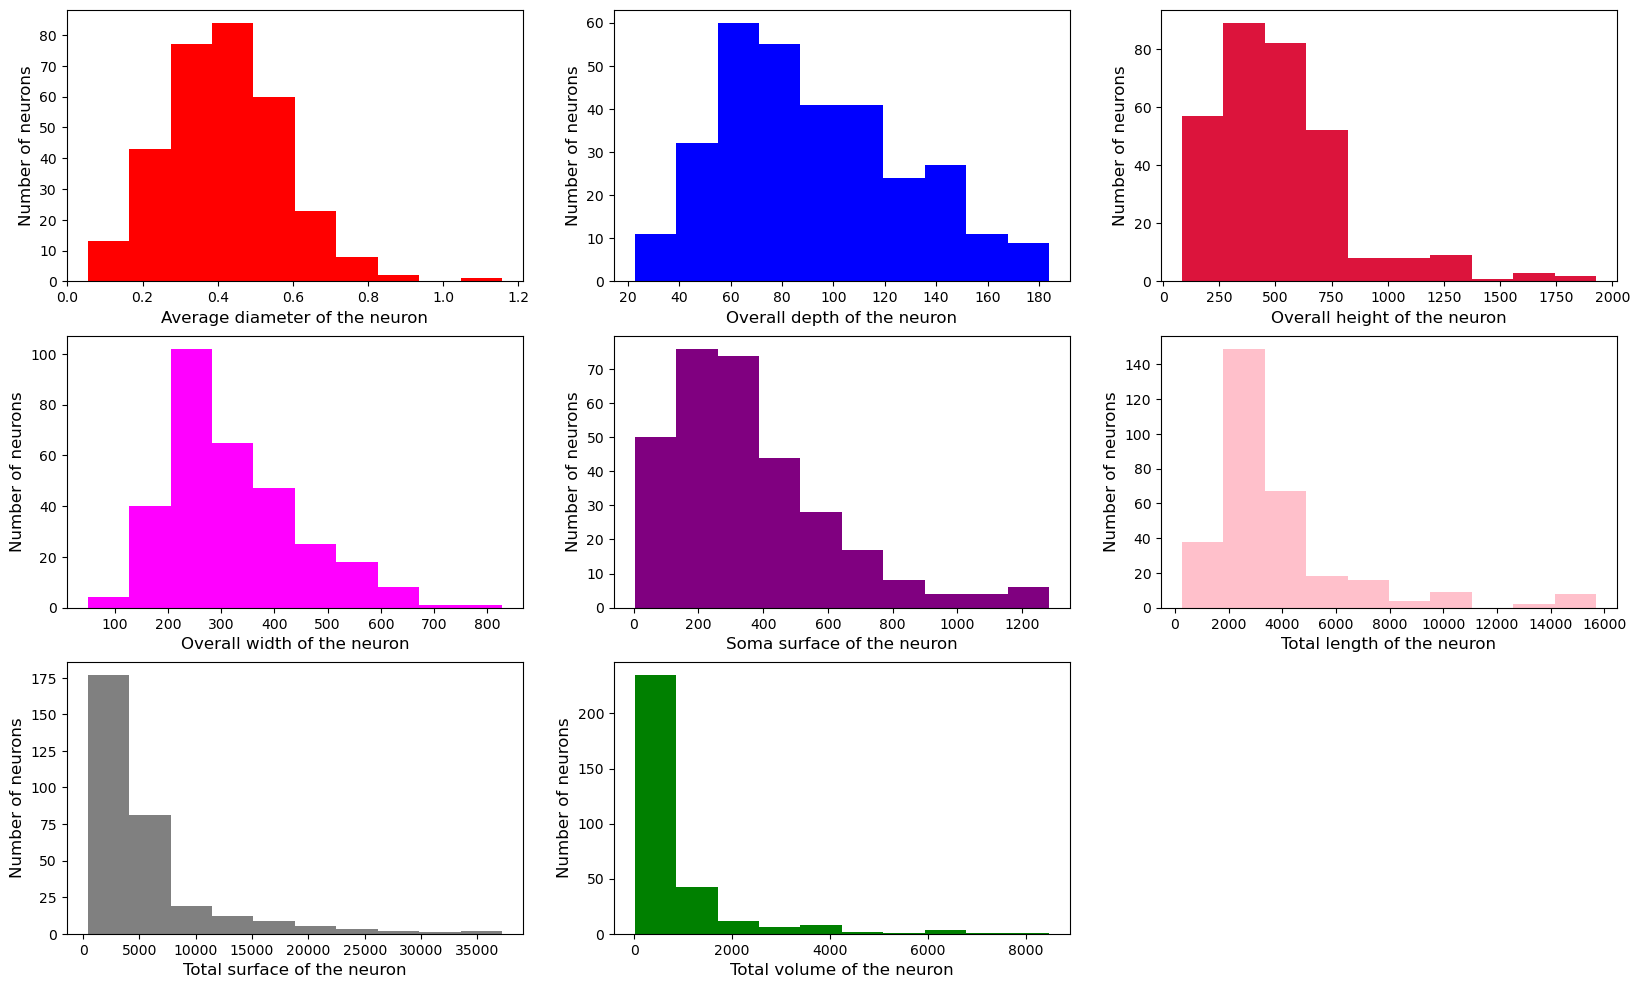

In [9]:
fig=plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
plt.hist(n_1_numerical.average_diameter, color='red')
plt.xlabel('Average diameter of the neuron',size=12)
plt.ylabel('Number of neurons',size=12)

plt.subplot(3,3,2)
plt.hist(n_1_numerical.overall_depth, color='blue')
plt.xlabel('Overall depth of the neuron',size=12)
plt.ylabel('Number of neurons',size=12)

plt.subplot(3,3,3)
plt.hist(n_1_numerical.overall_height, color='crimson')
plt.xlabel('Overall height of the neuron',size=12)
plt.ylabel('Number of neurons',size=12)

plt.subplot(3,3,4)
plt.hist(n_1_numerical.overall_width, color='magenta')
plt.xlabel('Overall width of the neuron',size=12)
plt.ylabel('Number of neurons',size=12)

plt.subplot(3,3,5)
plt.hist(n_1_numerical.soma_surface, color='purple')
plt.xlabel('Soma surface of the neuron',size=12)
plt.ylabel('Number of neurons',size=12)

plt.subplot(3,3,6)
plt.hist(n_1_numerical.total_length, color='pink')
plt.xlabel('Total length of the neuron',size=12)
plt.ylabel('Number of neurons',size=12)

plt.subplot(3,3,7)
plt.hist(n_1_numerical.total_surface, color='grey')
plt.xlabel('Total surface of the neuron',size=12)
plt.ylabel('Number of neurons',size=12)

plt.subplot(3,3,8)
plt.hist(n_1_numerical.total_volume, color='green')
plt.xlabel('Total volume of the neuron',size=12)
plt.ylabel('Number of neurons',size=12)

* The histograms make it quite clear that the features are right skewed.
* ***overall_depth*** is approximately normally distributed.


### Loading the second group of neurons as Pandas Dataframe 

In [10]:
n_2 = pd.read_csv("neurons_group_2.csv")

#### Inspecting 1st group of neurons

In [11]:
n_2.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,397905347,0.316091,117.5429,585.602322,287.122628,268.777679,3498.090031,3523.606841,306.290931
1,491119234,0.331268,81.9012,461.280515,275.146120,551.788645,2008.302439,2097.688550,188.431435
2,491119269,0.139015,57.5697,324.422347,280.851229,50.092109,1774.258366,776.076427,25.733000
3,491119394,0.230412,76.0357,368.298267,251.377567,244.457685,1650.188964,1198.531518,75.823080
4,491119419,0.321163,98.8344,417.890620,193.590563,252.423672,2066.369729,2085.789861,180.446414


In [12]:
n_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                390 non-null    int64  
 1   average_diameter  390 non-null    float64
 2   overall_depth     390 non-null    float64
 3   overall_height    390 non-null    float64
 4   overall_width     390 non-null    float64
 5   soma_surface      390 non-null    float64
 6   total_length      390 non-null    float64
 7   total_surface     390 non-null    float64
 8   total_volume      390 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 27.5 KB


In [13]:
n_2.isna().sum()

id                  0
average_diameter    0
overall_depth       0
overall_height      0
overall_width       0
soma_surface        0
total_length        0
total_surface       0
total_volume        0
dtype: int64

In [14]:
n_2_numerical=n_2.drop("id",axis='columns')

* This dataset contains 9 measurements of 390 neurons. Out of these 9 measurements, 8 are actual morphological measurements and the first one, viz., ***id*** is a unique identifier for each neuron.

* All the morphological features are measured in 
   * ***microns***(for lengths)
   * ***square microns***(for areas)
   * ***cubic microns***(for volume)

* The eight morphological features are as follows
   * ***average_diameter*** - Average Diameter of the neuron 
   * ***overall_depth*** - Overall depth of the neuron
   * ***overall_height*** - Overall height of the neuron
   * ***overall_width*** - Overall width of the neuron
   * ***soma_surface*** -  Soma surface of the neuron (main part of the neuron)
   * ***total_length*** - Total length of the neuron
   * ***total_surface*** - Total surface area of the neuron
   * ***total_volume*** - Total volume of the neuron 

* Thus, the measurements in group 2 of neurons are the same as in group 1.

* We also observe that there are no missing values in our dataset

In [15]:
n_2_numerical.describe()

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
count,390.000000,390.000000,390.000000,390.000000,3.900000e+02,390.000000,390.000000,390.000000
mean,0.435809,95.206552,510.985628,329.825056,3.724098e+02,3863.486035,5864.201976,902.496899
std,0.161908,36.158685,266.063788,138.325260,2.533013e+02,2801.099305,6203.166129,1427.630612
min,0.000007,21.840000,54.607838,83.647398,7.670000e-08,520.171366,0.021819,-0.000076
25%,0.326349,67.703400,318.040076,228.986718,2.039052e+02,2198.850326,2524.164229,226.169536
50%,0.435024,91.971850,475.387170,294.772976,3.264958e+02,2958.913455,3789.306776,447.101877
75%,0.524922,121.295050,646.002438,410.484375,4.829122e+02,4380.373700,6447.979594,914.352656
max,1.033745,180.320000,1988.717896,1295.286608,1.997534e+03,21775.359100,59086.631130,16108.163740


In [16]:
import scipy.stats as stats

In [17]:
cols = list(n_2_numerical.columns)

In [18]:
for col in cols:
    print(col)
    print(stats.ttest_ind(n_1_numerical[col], n_2_numerical[col]))

average_diameter
Ttest_indResult(statistic=-1.1970075781748384, pvalue=0.2317093984993563)
overall_depth
Ttest_indResult(statistic=-1.1857230913955603, pvalue=0.23613458215666971)
overall_height
Ttest_indResult(statistic=0.5860348440044614, pvalue=0.5580412742530052)
overall_width
Ttest_indResult(statistic=-0.9231920391791176, pvalue=0.3562256919514518)
soma_surface
Ttest_indResult(statistic=-0.547797643314149, pvalue=0.5840057333717408)
total_length
Ttest_indResult(statistic=-0.332599650604377, pvalue=0.7395362277560685)
total_surface
Ttest_indResult(statistic=-0.8152397825540432, pvalue=0.4152127535605644)
total_volume
Ttest_indResult(statistic=-0.9313735524535137, pvalue=0.35198192808008333)


It is clear from examining all of the t-test findings that the p-values for each property are higher than the ***alpha value of 0.01*** Thus, we can draw the conclusion that group 1 and group 2 neurons do not significantly differ in their features.

### Importing additonal features of neurons

In [19]:
n_additional = pd.read_csv("neurons_additional_measurements.csv")

In [20]:
n_additional.head()

,id,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,491119743,82.727781,0.864267,20.723077,0.964510,6,99.779724,126.593790,33,73,1470,7,40
1,546781359,82.506680,0.903890,105.277778,0.862183,3,432.383110,496.831994,9,23,2011,5,14
2,537042261,77.536678,0.863104,73.666667,0.926633,6,373.630444,436.958952,21,46,3137,4,25
3,689123605,76.583222,0.900537,95.979167,0.942049,11,943.382549,989.448318,24,52,4652,4,28
4,657879305,72.019250,0.873518,47.535714,1.000000,5,186.218009,221.639502,14,32,1406,4,18


In [21]:
n_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               694 non-null    int64  
 1   average_bifurcation_angle_local  694 non-null    float64
 2   average_contraction              694 non-null    float64
 3   average_fragmentation            694 non-null    float64
 4   average_parent_daughter_ratio    694 non-null    float64
 5   max_branch_order                 694 non-null    int64  
 6   max_euclidean_distance           694 non-null    float64
 7   max_path_distance                694 non-null    float64
 8   number_bifurcations              694 non-null    int64  
 9   number_branches                  694 non-null    int64  
 10  number_nodes                     694 non-null    int64  
 11  number_stems                     694 non-null    int64  
 12  number_tips           

In [22]:
n1_n2=pd.concat([n_1,n_2])

In [23]:
n1_n2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 389
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                701 non-null    int64  
 1   average_diameter  701 non-null    float64
 2   overall_depth     701 non-null    float64
 3   overall_height    701 non-null    float64
 4   overall_width     701 non-null    float64
 5   soma_surface      701 non-null    float64
 6   total_length      701 non-null    float64
 7   total_surface     701 non-null    float64
 8   total_volume      701 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.8 KB


In [24]:
combined_neurons = pd.merge(n1_n2,n_additional)

In [25]:
combined_neurons.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,...,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,...,48.081967,0.866582,7,476.921223,550.691106,31,70,3041,8,39
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,...,52.416667,0.950502,15,650.637431,957.710930,30,67,3271,7,37
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,...,73.821429,0.816243,5,477.440600,569.974920,14,32,2151,4,18
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,...,42.266667,0.822614,4,212.448082,249.521471,16,35,1292,3,19
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,...,39.733333,0.803137,3,242.351930,258.868561,15,36,1397,6,21


***This dataset contains 20 features of 694 neurons.***

In [26]:
n_1[n_1['id'].isin(n_additional['id']) == False]

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
65,495335458,0.351490,119.8840,661.567781,282.513632,757.149016,4369.050037,4815.884601,467.892153
130,556384323,0.243099,93.2400,144.739038,240.796724,51.493435,2148.380228,1645.638196,98.307475
190,610886034,0.470672,70.5379,623.816654,145.074648,230.864586,3313.199086,4897.644156,579.423510
230,653182658,0.480308,40.9819,263.895203,350.833442,438.340660,2402.931982,3636.755377,492.224651
308,841869334,0.462304,89.3004,585.271698,389.567416,529.311813,6640.732080,9759.033027,1262.798767


In [27]:
n_2[n_2['id'].isin(n_additional['id']) == False]

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
331,661930435,0.372487,136.3480,278.746352,494.820721,325.694591,5472.333123,6414.673716,604.937112
340,669287805,0.482867,69.7698,442.578166,324.459968,609.960522,2818.027682,4289.961763,547.046601


***Thus, 5 neurons from group 1 and 2 neurons from group 2 are not included in the additional features dataset.***

In [28]:
combined_neurons_numeric=combined_neurons.drop("id",axis='columns')

In [29]:
combined_neurons_numeric.head()

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,0.866136,48.081967,0.866582,7,476.921223,550.691106,31,70,3041,8,39
1,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,0.656121,52.416667,0.950502,15,650.637431,957.710930,30,67,3271,7,37
2,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,0.867122,73.821429,0.816243,5,477.440600,569.974920,14,32,2151,4,18
3,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,0.897780,42.266667,0.822614,4,212.448082,249.521471,16,35,1292,3,19
4,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,0.928043,39.733333,0.803137,3,242.351930,258.868561,15,36,1397,6,21


### Finding the Pearson correlation coefficient

In [30]:
corr=combined_neurons_numeric.corr(method='pearson')
corr

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
average_diameter,1.000000,0.229786,0.327179,0.367010,0.589195,0.352461,0.619391,0.658883,0.039447,-0.262180,0.353716,0.274922,0.172831,0.300276,0.313598,0.164862,0.151537,0.345626,-0.131749,0.138467
overall_depth,0.229786,1.000000,0.527627,0.515622,0.238661,0.566376,0.482570,0.405527,-0.067234,-0.168192,0.420348,0.004063,0.496938,0.542190,0.581248,0.434871,0.434845,0.552837,0.166980,0.433055
overall_height,0.327179,0.527627,1.000000,0.472310,0.306192,0.660042,0.618149,0.540829,-0.170636,-0.011630,0.546112,-0.057364,0.614627,0.954598,0.941420,0.432410,0.425560,0.655673,0.066929,0.417486
overall_width,0.367010,0.515622,0.472310,1.000000,0.400587,0.680065,0.660372,0.579829,-0.088734,-0.070939,0.655019,0.107348,0.269896,0.482814,0.502016,0.370920,0.365143,0.673310,0.061535,0.358484
soma_surface,0.589195,0.238661,0.306192,0.400587,1.000000,0.428615,0.549134,0.537021,-0.062920,-0.049990,0.330257,0.109646,0.155667,0.263454,0.265640,0.266762,0.263538,0.428377,0.055295,0.259445
total_length,0.352461,0.566376,0.660042,0.680065,0.428615,1.000000,0.913416,0.790274,-0.143934,-0.064172,0.456874,0.102789,0.599113,0.641754,0.654762,0.817617,0.811752,0.998333,0.234539,0.803354
total_surface,0.619391,0.482570,0.618149,0.660372,0.549134,0.913416,1.000000,0.958704,-0.124021,-0.136860,0.474200,0.183065,0.495238,0.597350,0.608415,0.684764,0.674198,0.909903,0.113077,0.661868
total_volume,0.658883,0.405527,0.540829,0.579829,0.537021,0.790274,0.958704,1.000000,-0.113610,-0.168131,0.436098,0.181217,0.401908,0.520168,0.531298,0.561337,0.550372,0.787010,0.058827,0.538113
average_bifurcation_angle_local,0.039447,-0.067234,-0.170636,-0.088734,-0.062920,-0.143934,-0.124021,-0.113610,1.000000,-0.256651,-0.033428,0.144248,-0.057797,-0.160161,-0.138639,-0.104305,-0.107519,-0.139077,-0.088756,-0.110187
average_contraction,-0.262180,-0.168192,-0.011630,-0.070939,-0.049990,-0.064172,-0.136860,-0.168131,-0.256651,1.000000,-0.232868,-0.196380,-0.055551,-0.038668,-0.095109,0.054079,0.059078,-0.067872,0.093060,0.063447


### Printing the 4 most strongly correlated features

In [31]:
upper_corr_mat = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values(ascending=False)
sorted_mat.head(10)

number_nodes            total_length              0.998333
number_tips             number_branches           0.998230
number_branches         number_bifurcations       0.997993
number_tips             number_bifurcations       0.992465
max_path_distance       max_euclidean_distance    0.989598
total_volume            total_surface             0.958704
max_euclidean_distance  overall_height            0.954598
max_path_distance       overall_height            0.941420
total_surface           total_length              0.913416
number_nodes            total_surface             0.909903
dtype: float64

* The above four pairs have ***strong positive correlation*** with Pearson Coefficients close to 1. 
* This means that their values are directly proportional.

<Axes: xlabel='number_tips', ylabel='number_bifurcations'>

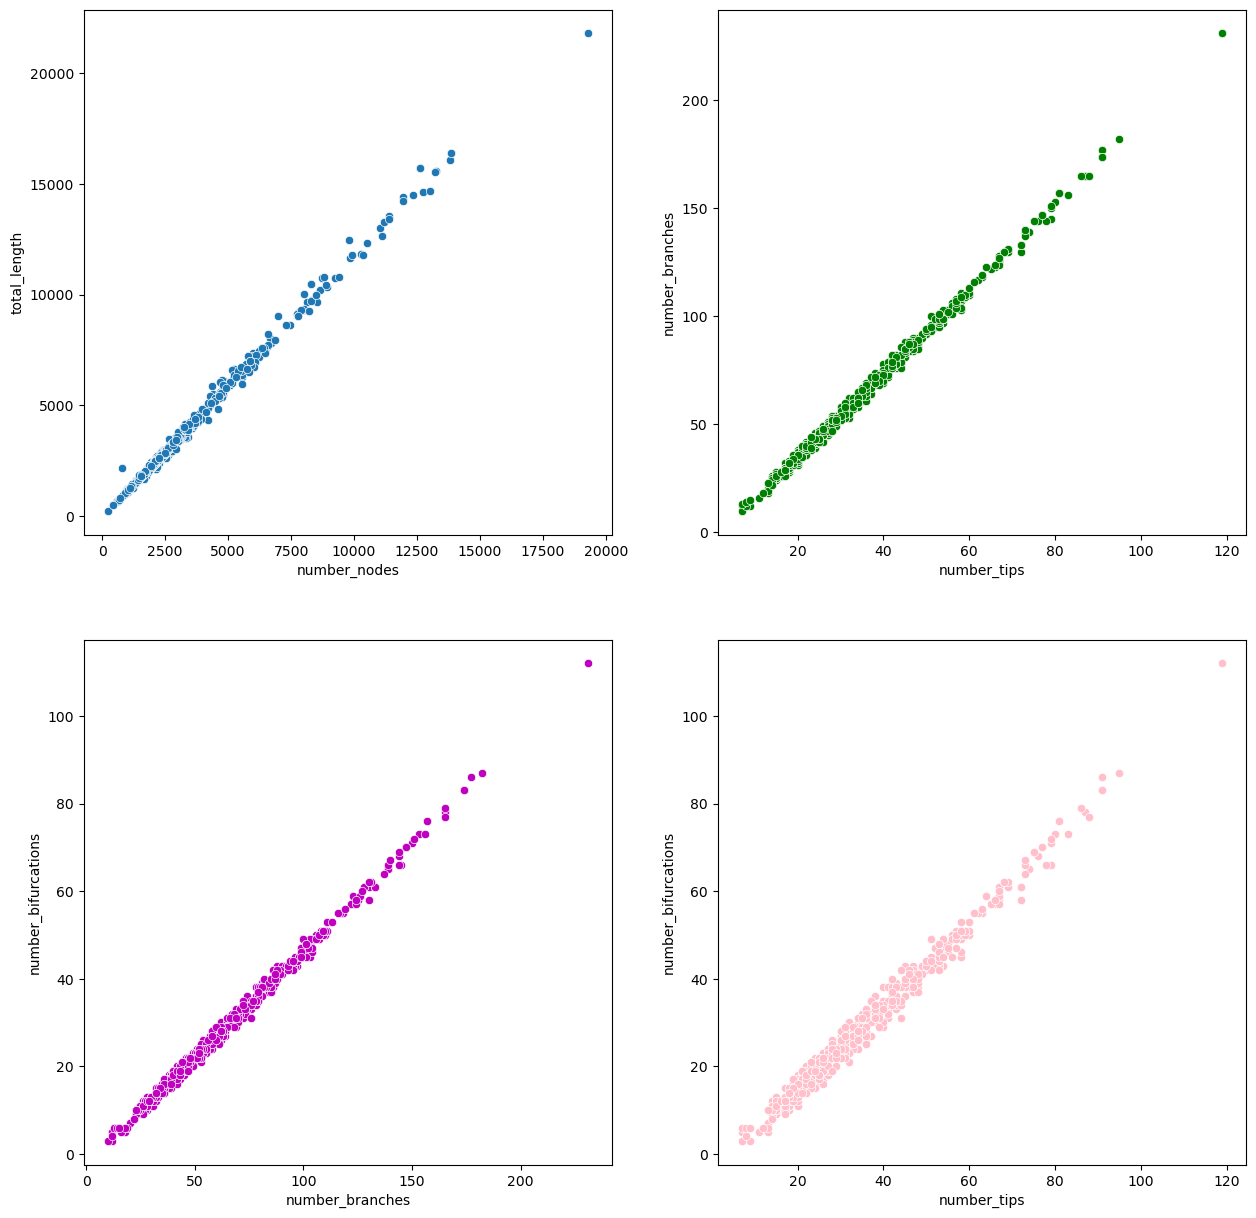

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
sns.scatterplot(ax=axs[0,0],x="number_nodes", y="total_length",data=combined_neurons_numeric)
sns.scatterplot(ax=axs[0,1],x="number_tips", y="number_branches",data=combined_neurons_numeric,color='g')
sns.scatterplot(ax=axs[1,0],x="number_branches", y="number_bifurcations",data=combined_neurons_numeric,color='m')
sns.scatterplot(ax=axs[1,1],x="number_tips", y="number_bifurcations",data=combined_neurons_numeric,color='pink')

* ***The scatterplots between the above four pairs of features confirms the strong linear relationship between them as found by their Pearson Coefficients.***

In [33]:
combined_neurons_numeric.head()

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,0.866136,48.081967,0.866582,7,476.921223,550.691106,31,70,3041,8,39
1,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,0.656121,52.416667,0.950502,15,650.637431,957.710930,30,67,3271,7,37
2,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,0.867122,73.821429,0.816243,5,477.440600,569.974920,14,32,2151,4,18
3,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,0.897780,42.266667,0.822614,4,212.448082,249.521471,16,35,1292,3,19
4,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,0.928043,39.733333,0.803137,3,242.351930,258.868561,15,36,1397,6,21


###  Separating the data into response and predictor variables and standardise the predictor variables.

In [34]:
X_Predictor=combined_neurons_numeric.drop(['total_surface'],axis=1)
X_Predictor_std = (X_Predictor-X_Predictor.mean())/X_Predictor.std()
Y=pd.Series(combined_neurons_numeric['total_surface'])

In [35]:
X_Predictor_std.head()

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_volume,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,-1.448772,-0.096352,0.111315,-0.518593,-0.941779,-0.061858,-0.560910,0.426456,-0.335948,-0.370420,-0.773570,-0.172691,0.336109,0.392372,0.222823,0.282720,-0.095389,0.977580,0.338504
1,0.174141,-0.188422,0.709689,-0.955790,0.250071,0.116918,-0.100197,1.432544,-5.987405,-0.192687,0.325004,1.722134,1.098971,2.031672,0.156511,0.185891,0.001901,0.499469,0.213179
2,-0.830426,-0.513683,0.236540,0.455299,0.531507,-0.416059,-0.499842,-0.312825,-0.309421,0.684963,-1.432538,-0.646397,0.338390,0.470039,-0.904479,-0.943779,-0.471859,-0.934867,-0.977409
3,-0.095939,-0.131937,-0.826138,-0.651629,0.065570,-0.817677,-0.469546,-0.280678,0.515598,-0.608862,-1.349144,-0.883251,-0.825305,-0.820610,-0.771855,-0.846950,-0.835216,-1.412979,-0.914747
4,-1.413495,-1.369353,-0.764399,-0.017297,-0.973471,-0.789824,-0.606731,-0.452203,1.329960,-0.712736,-1.604103,-1.120104,-0.693985,-0.782964,-0.838167,-0.814674,-0.790801,0.021357,-0.789422


In [36]:
import statsmodels.api as sm
mod = sm.OLS(Y,X_Predictor_std)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          total_surface   R-squared (uncentered):                   0.522
Model:                            OLS   Adj. R-squared (uncentered):              0.509
Method:                 Least Squares   F-statistic:                              40.98
Date:                Fri, 05 Jan 2024   Prob (F-statistic):                    1.33e-95
Time:                        16:35:07   Log-Likelihood:                         -6990.5
No. Observations:                 694   AIC:                                  1.402e+04
Df Residuals:                     676   BIC:                                  1.410e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

* Total surface serves as our response variable in our regression analysis.
* We are using OLS model because it is the most efficient linear regression estimator.
* Our aim is to minimize the squares of errors.
* N = 694, is the number of observations, i.e, size of dataset.
* Degree of Freedom of our mode is given by (No of predictor variables - 1)= 19-1=18
* Skew value is negative which means left skewed data.
* The predictor variables are responsible for 52% of the variation in the dependent variable "total surface," as calculated by  R² value of 0.522.
* The AIC and BIC values are large. These are ***1.402e+04*** and ***1.410e+04*** for AIC and BIC respectively.
* Coefficient terms indicate the changes in Y for a unit change in a particular X, while holding the other values of X's fixed.



In [37]:
def forwardAIC(X,y):
    mod = sm.OLS(y, X.iloc[:,0]).fit()
    best_aic = mod.aic
    bad_model = True
    chosen_vars = [0]
    remaining_vars = range(1,X.shape[1])
    while(bad_model):
        curr_aic = np.empty(len(remaining_vars))
        curr_aic_diff = np.empty(len(remaining_vars))
        for count, i in enumerate(remaining_vars):
            curr_vars = np.append(chosen_vars,i)
            curr_mod = sm.OLS(y, X.iloc[:,curr_vars]).fit()
            curr_aic[count] = curr_mod.aic
            curr_aic_diff[count] = curr_mod.aic - best_aic
        if len(remaining_vars)==0:
            bad_model=False
        elif np.min(curr_aic_diff)>0:
            bad_model = False
        else:
            best_var = remaining_vars[np.argmin(curr_aic_diff)]
            best_aic = curr_aic[np.argmin(curr_aic_diff)]
            chosen_vars = np.append(chosen_vars,best_var)
            remaining_vars = [x for x in remaining_vars if x != best_var]
    return chosen_vars

In [38]:
print(X_Predictor.columns[forwardAIC(X_Predictor_std,Y )])

Index(['average_diameter', 'total_length', 'total_volume'], dtype='object')


* The features selected by Forward AIC are as follows:
 * ***average_diameter***
 * ***total_length***
 * ***total_volume***

In [39]:
selected_columns_AIC = forwardAIC(X_Predictor_std, Y)
mod_after_AIC = sm.OLS(Y,X_Predictor_std.iloc[:,selected_columns_AIC])
res_after_AIC = mod_after_AIC.fit()
print(res_after_AIC.summary())

                                 OLS Regression Results                                
Dep. Variable:          total_surface   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.519
Method:                 Least Squares   F-statistic:                              250.7
Date:                Fri, 05 Jan 2024   Prob (F-statistic):                   4.74e-110
Time:                        16:35:08   Log-Likelihood:                         -6991.0
No. Observations:                 694   AIC:                                  1.399e+04
Df Residuals:                     691   BIC:                                  1.400e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

* Using the features selected by forward AIC, we get the above results:
 * p-value is smaller than significance level, so we reject null hypothesis.
 * For 1 unit rise in average diameter, the total surface area increases by 705.61 units
 * For 1 unit rise in total length, the total surface area increases by 2812.71 units.
 * For 1 unit rise in total volume, the total surface area increases by 3081.16 units.
 * Value of coefficients for these features has increased.
 

In [40]:
def forwardBIC(X,y):
    mod = sm.OLS(y, X.iloc[:,0]).fit()
    best_bic = mod.bic
    bad_model = True
    chosen_vars = [0]
    remaining_vars = range(1,X.shape[1])
    while(bad_model):
        curr_bic = np.empty(len(remaining_vars))
        curr_bic_diff = np.empty(len(remaining_vars))
        for count, i in enumerate(remaining_vars):
            curr_vars = np.append(chosen_vars,i)
            curr_mod = sm.OLS(y, X.iloc[:,curr_vars]).fit()
            curr_bic[count] = curr_mod.bic
            curr_bic_diff[count] = curr_mod.bic - best_bic
        if len(remaining_vars)==0:
            bad_model=False
        elif np.min(curr_bic_diff)>0:
            bad_model = False
        else:
            best_var = remaining_vars[np.argmin(curr_bic_diff)]
            best_bic = curr_bic[np.argmin(curr_bic_diff)]
            chosen_vars = np.append(chosen_vars,best_var)
            remaining_vars = [x for x in remaining_vars if x != best_var]
    return chosen_vars

In [41]:
print(X_Predictor.columns[forwardBIC(X_Predictor_std,Y)])

Index(['average_diameter', 'total_length', 'total_volume'], dtype='object')


In [42]:
selected_columns_BIC = forwardBIC(X_Predictor_std, Y)
mod_after_BIC = sm.OLS(Y,X_Predictor_std.iloc[:,selected_columns_BIC])
res_after_BIC = mod_after_AIC.fit()
print(res_after_BIC.summary())

                                 OLS Regression Results                                
Dep. Variable:          total_surface   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.519
Method:                 Least Squares   F-statistic:                              250.7
Date:                Fri, 05 Jan 2024   Prob (F-statistic):                   4.74e-110
Time:                        16:35:08   Log-Likelihood:                         -6991.0
No. Observations:                 694   AIC:                                  1.399e+04
Df Residuals:                     691   BIC:                                  1.400e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

***AIC***

A continuous as well as the corresponding interval between the uncertain, correct, and justified probability of the facts are evaluated using the ***Akaike Information Criteria (AIC)***.

The model serves this integrated probability objective. A model is therefore thought to be more accurate if its AIC is lower. It is helpful for false-negative conclusions.


A probability of less than 1 is necessary to arrive to a valid model. AIC has an unlimited and comparatively large number of dimensions. As a result, it produces inconsistent and complex results.

***BIC***

The ***Bayesian Information Criteria (BIC)*** is an assessment of the likelihood that the model is accurate given a specific Bayesian structure. Therefore, a lower BIC indicates that a model is accepted to be more likely to be the accurate model.

The terms of the penalty are severe. Its finite dimension produces reliable and simple findings. Its ideal coverage, according to scientists, is smaller than the AIC for assumptions. That even leads to the highest level of risk-taking. N can be defined in this situation.

## Random forest regression to predict the total surface area of a neuron (total surface).

### Splitting the data into training and test sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_Predictor, Y, test_size=0.25, random_state=123)

In [44]:
random_forest = RandomForestRegressor(n_estimators=10, random_state = 101)
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

0.9882873626961493

In [45]:
selector = SelectFromModel(estimator=RandomForestRegressor()).fit(X_train, y_train)

<BarContainer object of 19 artists>

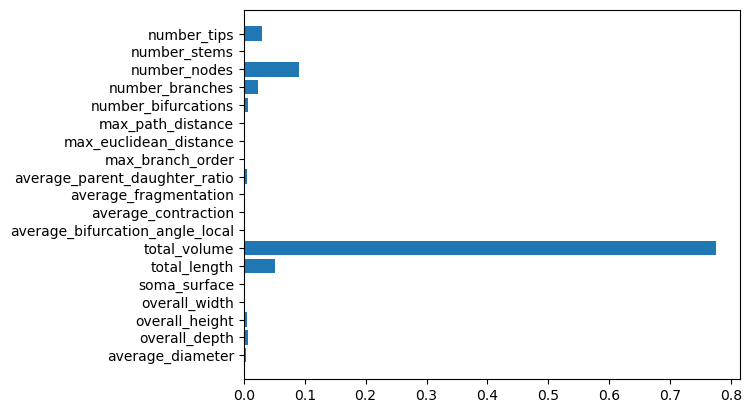

In [46]:
random_forest.feature_importances_
plt.barh(X_Predictor.columns, random_forest.feature_importances_)

The important features are :
 * ***total_volume***
 * ***number_nodes***
 * ***total_length***

***In AIC regression to extract the key characteristics from the linear regression model, we got total length, total volume, and average diameter.
In BIC regression to extract the key features from the linear regression model, we got total length and total volume.***

In [47]:
random_forest = RandomForestRegressor(n_estimators=10, random_state = 101)
random_forest.fit(X_train[['number_nodes', 'total_length', 'total_volume']], y_train)
random_forest.score(X_test[['number_nodes', 'total_length', 'total_volume']], y_test)

0.9921187493887522

In [48]:
y_prediction=random_forest.predict(X_test[['number_nodes', 'total_length', 'total_volume']])

Text(0.5, 1.0, 'Predicted vs Actual Surface Area')

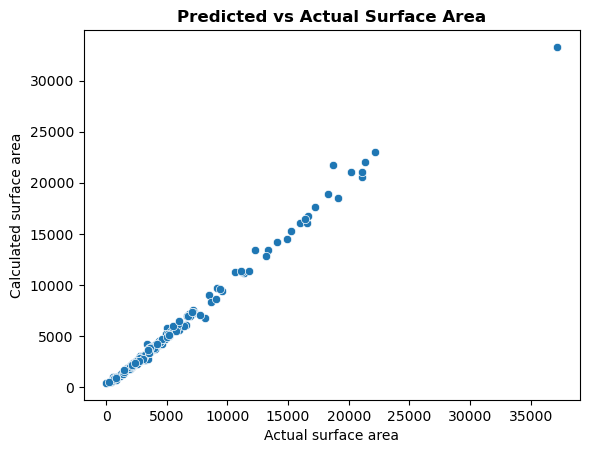

In [49]:
sns.scatterplot(x = y_test, y = y_prediction)
plt.xlabel('Actual surface area')
plt.ylabel('Calculated surface area')
plt.title("Predicted vs Actual Surface Area",fontweight='bold')

***We may deduce from the above plot that the majority of the plot's points are diagonal and that they nearly form a straight line. This leads us to the conclusion that the majority of surface area predictions match the actual surface area. Additionally, we can observe that the predicted value only deviates marginally from the genuine value in a few observations of the plot. According to calculations, this model's accuracy is 99.15%.***

### Measuring performance of Random forest regressor using different number of trees over 30 iterations

In [50]:
Performance_data = pd.DataFrame({'no_of_trees': pd.Series(dtype='int'),
                   'iteration_number': pd.Series(dtype='int'),
                   'standard error': pd.Series(dtype='float')})

In [51]:
for i in [5, 10, 20, 50, 100, 200, 500, 1000]:
    for j in range(1, 31):
        random_forest = RandomForestRegressor(n_estimators=i)
        random_forest.fit(X_train[['number_nodes', 'total_length', 'total_volume']], y_train)
        reg_test_pred = random_forest.predict(X_test[['number_nodes', 'total_length', 'total_volume']])
        MSE_reg = np.mean(pow((reg_test_pred - y_test),2))
        Performance_data = pd.concat([Performance_data, pd.DataFrame({'no_of_trees' : [i], 'iteration_number' : [j],  'standard error' : [MSE_reg]})])
    

display(Performance_data)

,no_of_trees,iteration_number,standard error
0,5,1,331333.929673
0,5,2,859082.602154
0,5,3,395117.455179
0,5,4,347871.686190
0,5,5,462681.076600
...,...,...,...
0,1000,26,301193.944913
0,1000,27,320688.572366
0,1000,28,320743.943086
0,1000,29,293960.657281


In [52]:
Performance_data_mean = Performance_data.groupby('no_of_trees', as_index=False).mean().drop("iteration_number",axis='columns')
Performance_data_mean.columns = ['no_of_trees', 'standard error']
Performance_data_mean

,no_of_trees,standard error
0,5,516566.713311
1,10,386151.557297
2,20,363439.187208
3,50,351817.682303
4,100,331389.065250
5,200,328106.982464
6,500,323335.419679
7,1000,326006.054325


[None]

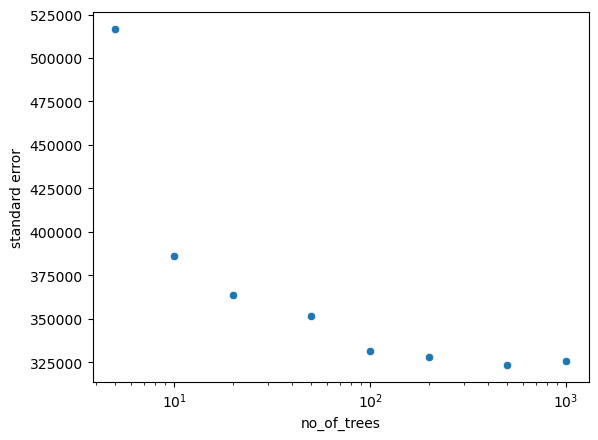

In [53]:
performance_plot= sns.scatterplot(data =Performance_data_mean , x = 'no_of_trees', y = 'standard error')
performance_plot.set(xscale = 'log')

***The MSE plot demonstrates that the error falls as the number of trees rises and then plateaus after a certain point. The curve is decreasing exponentially.***

### REASONS TO USE DIFFERENT RANDOM STATES FOR THE MODEL

We generally use a random state in machine learning models for the following reasons.
 * ***Consistency:*** 
 * ***Increase model performance:***
 * ***Increase model performance:***


# Clustering algorithms to identify different neuron types

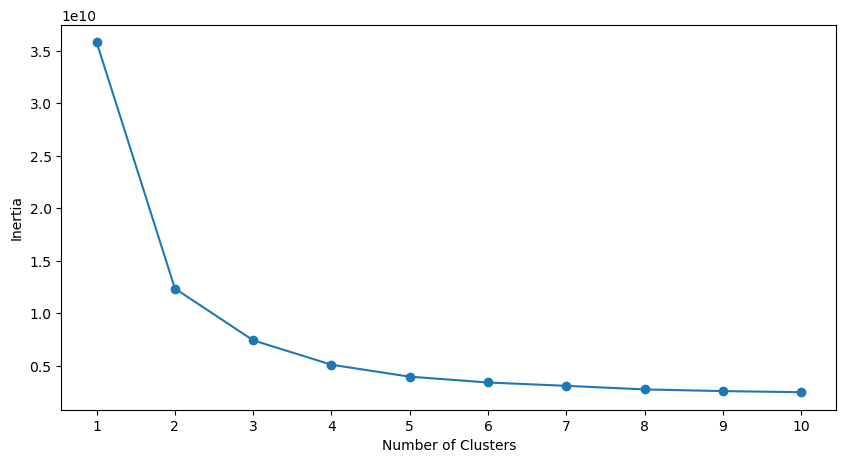

In [54]:
inertia_list = []
for i in range(1,11):
    KM = KMeans(init="random",n_clusters = i,random_state = 42)
    KM.fit(combined_neurons_numeric)
    inertia_list.append(KM.inertia_)
    
fig = plt.figure(figsize=(10,5))
plt.plot(list(range(1,11)),inertia_list)
plt.scatter(list(range(1,11)),inertia_list)
plt.xticks(list(range(1,11)))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [55]:
KM = KMeans(n_clusters=3).fit(combined_neurons_numeric)
pred = KM.predict(combined_neurons_numeric)
combined_neurons_numeric['Cluster'] = pred
display(combined_neurons_numeric)

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,...,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips,Cluster
0,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,0.866136,...,0.866582,7,476.921223,550.691106,31,70,3041,8,39,1
1,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,0.656121,...,0.950502,15,650.637431,957.710930,30,67,3271,7,37,1
2,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,0.867122,...,0.816243,5,477.440600,569.974920,14,32,2151,4,18,1
3,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,0.897780,...,0.822614,4,212.448082,249.521471,16,35,1292,3,19,1
4,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,0.928043,...,0.803137,3,242.351930,258.868561,15,36,1397,6,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0.375704,67.2280,306.770911,216.055257,225.837006,2607.623334,3077.924198,287.670058,91.555459,0.863968,...,0.987527,6,188.685223,221.489383,23,52,2246,6,29,1
690,0.423685,60.2975,290.299646,327.310902,356.208499,2262.953570,3040.696842,377.968196,77.900825,0.919881,...,0.811129,4,208.960395,230.849635,22,48,1934,4,26,1
691,0.682420,140.7840,1465.667623,549.027038,589.639480,16393.372040,35156.450590,6387.544545,76.931788,0.869628,...,0.983187,17,1279.217738,1399.216195,83,174,13862,8,91,2
692,0.500792,172.8656,736.768599,487.972675,412.997691,7001.423255,11103.672810,1470.613203,65.800629,0.923745,...,1.001120,7,574.428357,681.880147,48,101,5874,5,53,0


In [56]:
combined_neurons_numeric[combined_neurons_numeric['Cluster'] == 0]

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,...,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips,Cluster
104,0.534196,63.8400,596.539834,430.341270,359.235921,5370.460301,9011.258526,1386.217693,68.989018,0.884501,...,0.881200,10,434.024373,567.270906,38,81,4706,5,43,0
107,0.412721,124.5504,726.307957,448.947012,495.918710,6528.466382,8490.279934,1008.966420,72.416007,0.909263,...,0.906501,28,650.700018,773.680975,66,144,5623,12,78,0
114,0.424750,126.5846,715.481859,585.691252,590.200507,9206.329867,12207.613910,1505.232050,69.629828,0.851035,...,0.884581,9,548.378464,646.937150,50,106,7792,6,56,0
117,0.360909,152.6196,767.316139,492.972831,865.140265,13009.683210,14664.744690,1505.741958,73.960883,0.865122,...,0.835763,11,568.771670,659.603344,57,123,11024,9,66,0
124,0.813307,149.4016,1725.447884,494.997745,811.671327,7284.819454,18722.549750,6151.897747,72.247087,0.861408,...,0.890828,9,1280.539902,1381.914240,26,57,6194,5,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.659220,120.0690,582.891844,549.337840,311.981258,7587.058047,15725.530600,2946.257220,84.951203,0.859646,...,0.979625,12,462.724180,548.166931,44,95,6350,7,51,0
676,0.426246,107.7692,1071.407023,514.741068,196.307466,9241.190170,12376.712150,1535.748582,66.138736,0.845688,...,0.949218,9,810.015338,880.277471,34,72,8208,4,38,0
677,0.675817,121.6351,947.291598,718.036298,817.969570,6290.113213,13365.538540,2414.429997,85.995836,0.888314,...,0.944125,4,597.041285,686.049789,19,42,5323,4,23,0
680,0.357642,115.6736,1027.191626,589.310787,195.270777,16051.870780,18026.218420,1721.228798,72.929099,0.911064,...,0.948673,11,850.967961,944.400260,72,151,13797,7,79,0


In [57]:
combined_neurons_numeric[combined_neurons_numeric['Cluster'] == 1]

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,...,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips,Cluster
0,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,0.866136,...,0.866582,7,476.921223,550.691106,31,70,3041,8,39,1
1,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,0.656121,...,0.950502,15,650.637431,957.710930,30,67,3271,7,37,1
2,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,0.867122,...,0.816243,5,477.440600,569.974920,14,32,2151,4,18,1
3,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,0.897780,...,0.822614,4,212.448082,249.521471,16,35,1292,3,19,1
4,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,0.928043,...,0.803137,3,242.351930,258.868561,15,36,1397,6,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.515843,47.7456,709.752434,201.909985,662.812317,2852.072949,4621.600042,618.725628,72.017576,0.930489,...,0.987560,7,449.536507,477.151006,21,44,2474,2,23,1
688,0.481397,99.3879,219.076429,218.784605,348.243643,1264.370246,1907.156526,229.294124,80.642154,0.837715,...,1.000000,4,152.429462,195.583269,10,23,1100,3,13,1
689,0.375704,67.2280,306.770911,216.055257,225.837006,2607.623334,3077.924198,287.670058,91.555459,0.863968,...,0.987527,6,188.685223,221.489383,23,52,2246,6,29,1
690,0.423685,60.2975,290.299646,327.310902,356.208499,2262.953570,3040.696842,377.968196,77.900825,0.919881,...,0.811129,4,208.960395,230.849635,22,48,1934,4,26,1


In [58]:
combined_neurons_numeric[combined_neurons_numeric['Cluster'] == 2]

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,...,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips,Cluster
141,0.572116,163.5144,1154.006176,482.334788,836.402070,14378.137450,25748.89844,4154.263073,65.029891,0.909121,...,0.962483,16,954.711634,1026.567205,87,182,11933,8,95,2
169,0.736788,124.6061,1023.820380,569.400946,1038.624012,15558.760340,37182.28410,8482.061401,78.149396,0.903646,...,0.984764,17,808.965139,928.855885,78,165,13253,9,87,2
253,0.580538,122.9200,1090.156129,641.298893,692.687657,15540.254620,28986.54552,5074.956623,56.769672,0.882768,...,0.947422,15,891.125006,957.439657,73,153,13215,7,80,2
265,0.564407,145.9102,1250.756598,614.912207,1163.329155,14488.033450,25687.71206,3912.667582,74.569053,0.892567,...,0.974234,18,1046.365593,1157.225329,65,139,12338,9,74,2
271,0.603688,131.5765,1204.321388,484.041229,1264.894746,13521.316980,26552.33225,5348.134753,58.545815,0.884769,...,0.913670,15,800.920919,846.613261,62,130,11366,6,68,2
283,0.522902,145.0212,1045.098505,580.379125,883.210956,14626.800390,24084.45742,4017.048565,66.252847,0.859767,...,0.973880,19,844.416391,940.923675,70,147,12735,7,77,2
285,0.680385,100.8300,1163.076905,464.622125,1078.708578,14681.280410,31466.21272,6415.133751,76.897268,0.836116,...,0.968530,11,923.398169,1043.698922,86,177,13007,5,91,2
305,0.692856,172.4727,723.834775,631.075665,647.687677,15697.415190,35115.08610,7091.887074,68.757495,0.848959,...,0.990904,10,501.714425,605.046105,76,157,12622,5,81,2
468,0.893205,138.2268,468.509674,549.684530,1004.589630,8234.599623,25338.73932,7924.622687,60.883495,0.809299,...,0.988117,10,389.401972,536.358882,43,92,6565,6,49,2
517,0.783455,99.2183,1988.717896,542.515300,353.840190,10432.281560,25709.99533,5968.433593,73.057039,0.794714,...,0.921145,15,1571.731361,1695.709022,31,67,8878,5,36,2


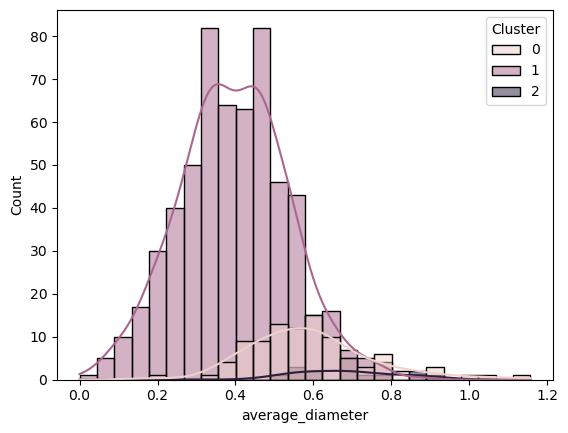

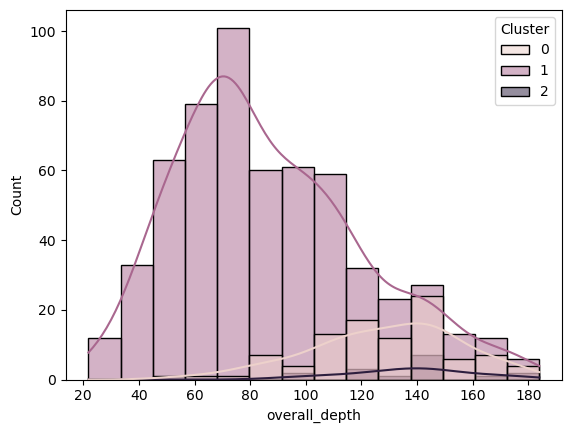

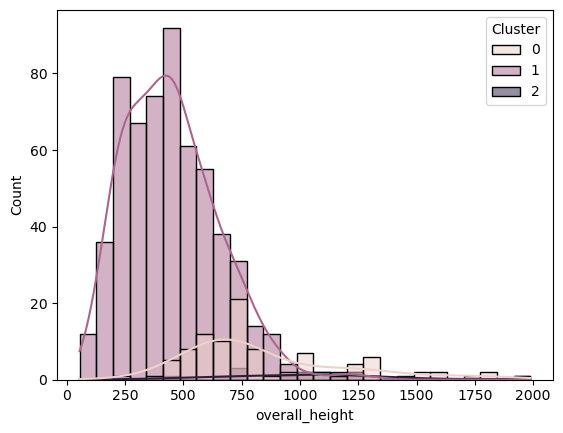

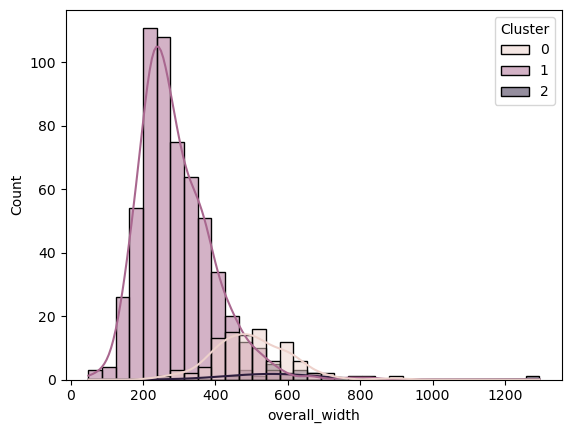

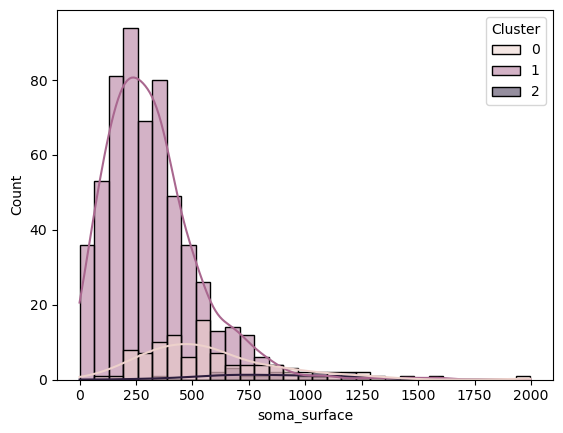

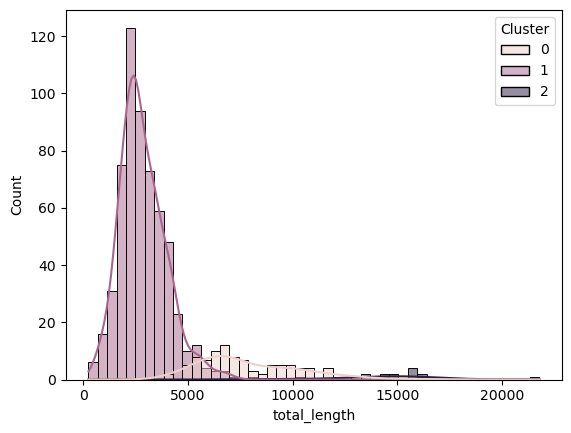

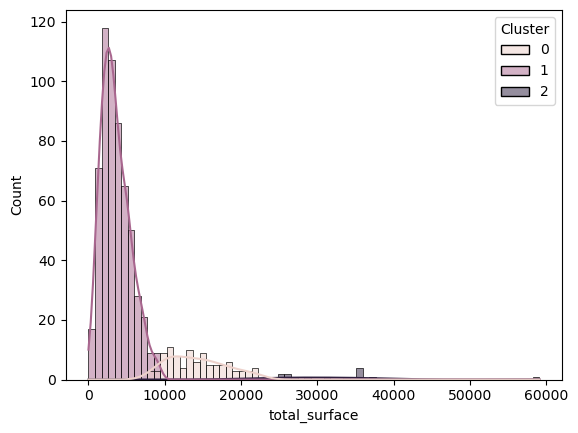

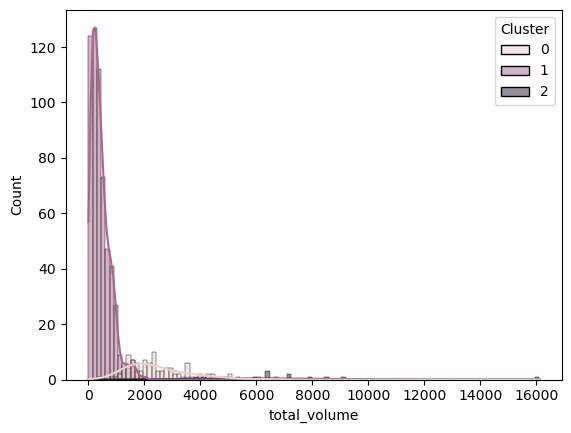

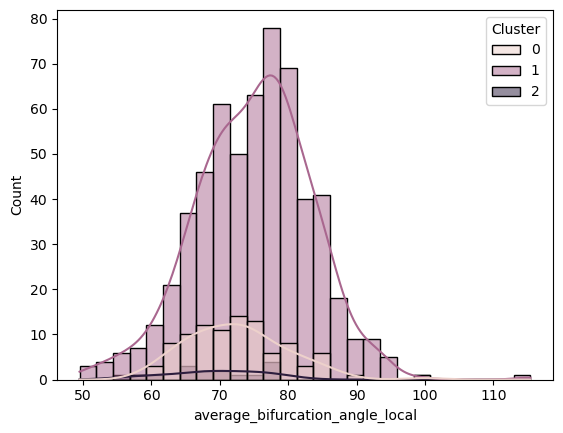

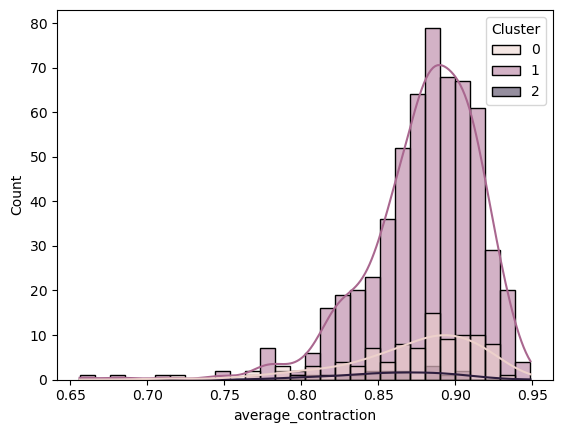

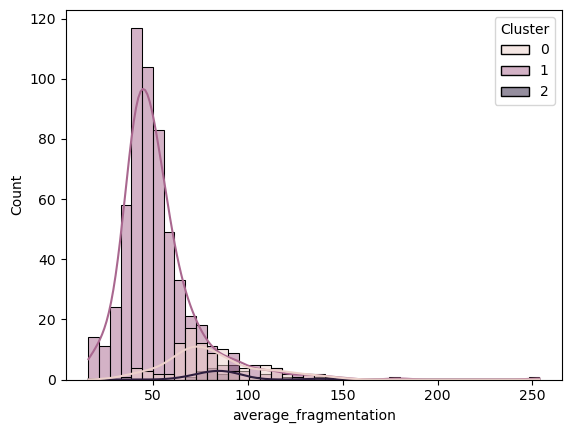

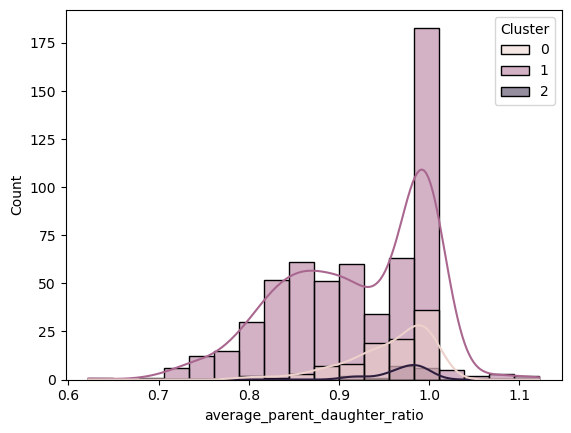

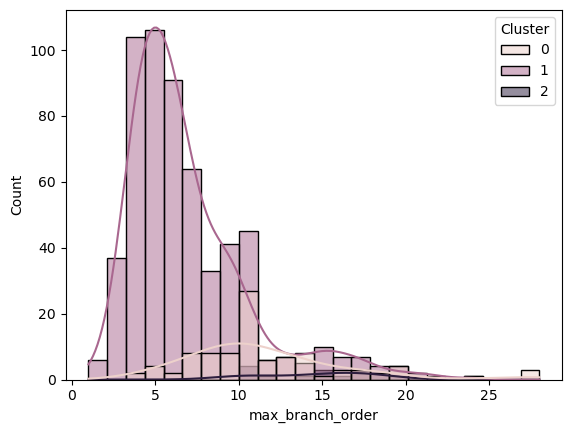

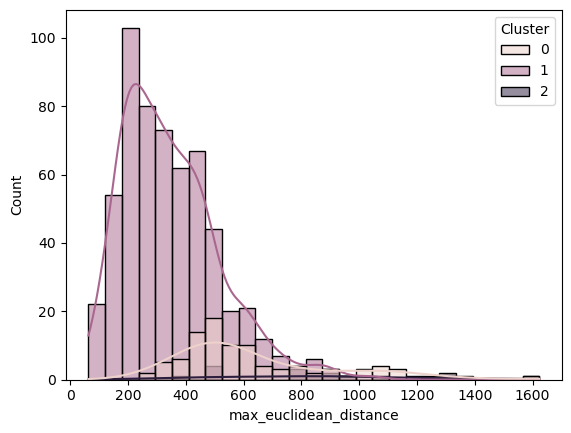

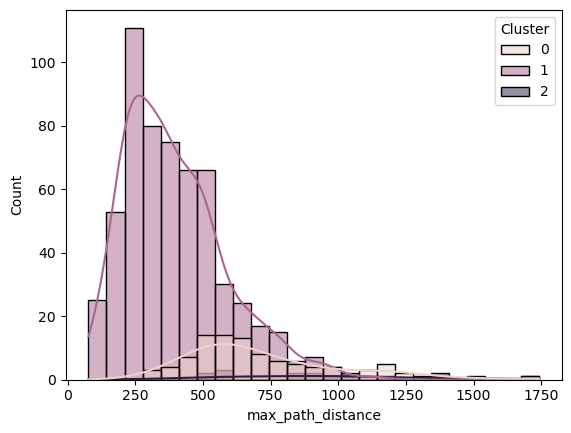

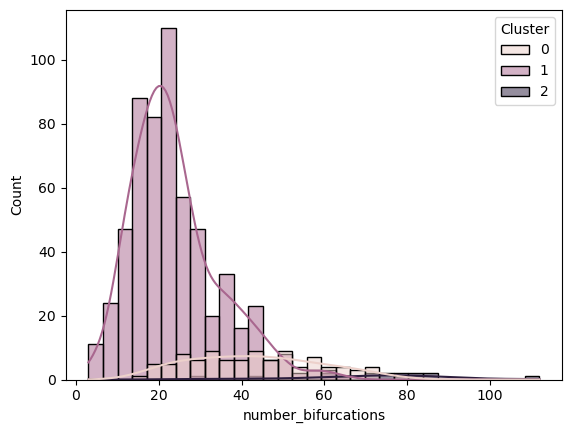

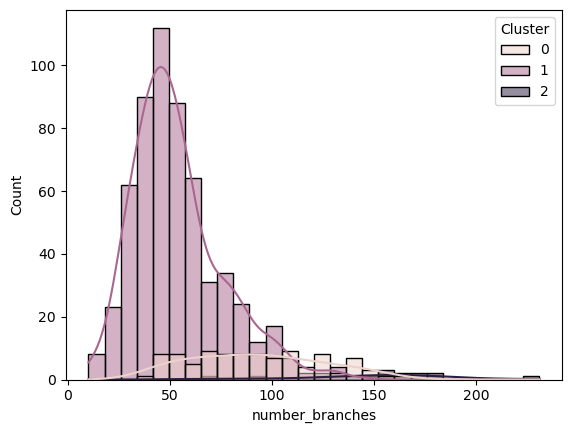

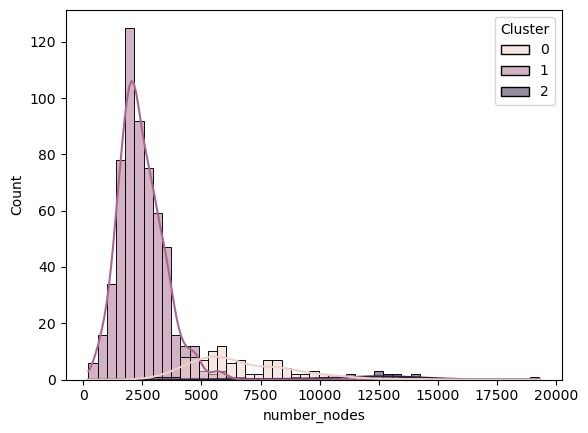

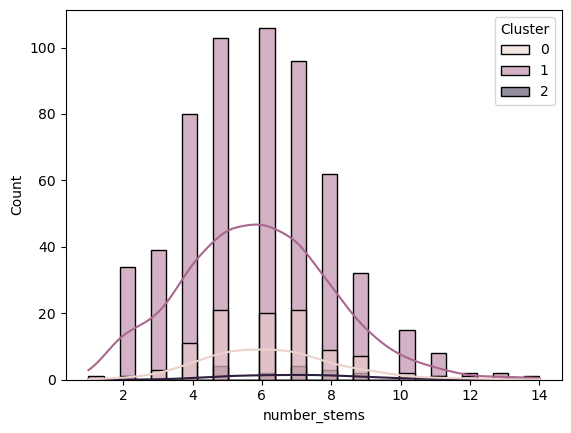

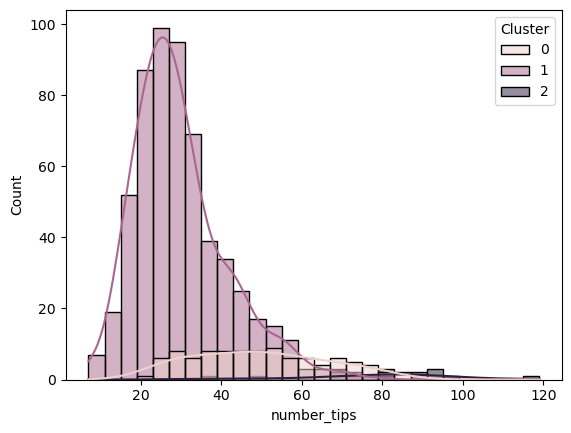

In [59]:
 for column in combined_neurons_numeric.drop("Cluster",axis=1).columns:
        
        sns.histplot(data=combined_neurons_numeric, x=column,hue="Cluster", kde = True,color='pink')
        plt.show()

***total length, total surface, total volume and number of nodes are the most discriminatory variables.***

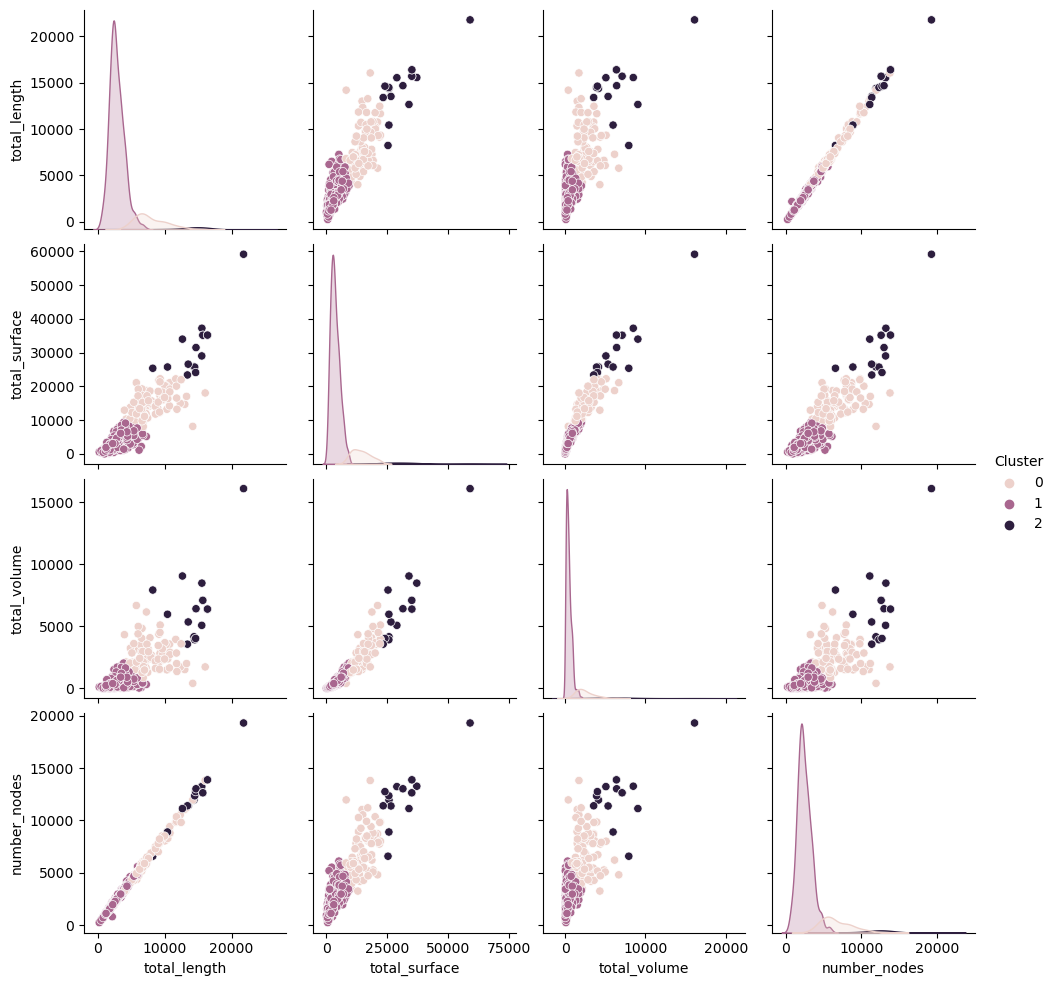

In [60]:
sns.pairplot(data=combined_neurons_numeric[['total_length', 'total_surface', 'total_volume', 'number_nodes', 'Cluster']], hue='Cluster')

***Another potent clustering algorithm used in unsupervised learning is mean-shift. It does not make any assumptions, unlike K-means clustering, making it a non-parametric approach.
In essence, the mean-shift algorithm assigns datapoints to clusters iteratively by moving points toward the location with the highest density of datapoints, or cluster centroid.
The Mean-Shift algorithm differs from the K-Means algorithm in that the latter does not require the user to define the number of clusters in advance because the algorithm will decide the number of clusters based on the data.***

In [61]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
BW = estimate_bandwidth(combined_neurons_numeric)

mean_shift = MeanShift(bandwidth=BW).fit(combined_neurons_numeric)
pred = mean_shift.predict(combined_neurons_numeric)
combined_neurons_numeric['Cluster_ms'] = pred
display(combined_neurons_numeric)

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,...,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips,Cluster,Cluster_ms
0,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,0.866136,...,7,476.921223,550.691106,31,70,3041,8,39,1,0
1,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,0.656121,...,15,650.637431,957.710930,30,67,3271,7,37,1,0
2,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,0.867122,...,5,477.440600,569.974920,14,32,2151,4,18,1,0
3,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,0.897780,...,4,212.448082,249.521471,16,35,1292,3,19,1,0
4,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,0.928043,...,3,242.351930,258.868561,15,36,1397,6,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0.375704,67.2280,306.770911,216.055257,225.837006,2607.623334,3077.924198,287.670058,91.555459,0.863968,...,6,188.685223,221.489383,23,52,2246,6,29,1,0
690,0.423685,60.2975,290.299646,327.310902,356.208499,2262.953570,3040.696842,377.968196,77.900825,0.919881,...,4,208.960395,230.849635,22,48,1934,4,26,1,0
691,0.682420,140.7840,1465.667623,549.027038,589.639480,16393.372040,35156.450590,6387.544545,76.931788,0.869628,...,17,1279.217738,1399.216195,83,174,13862,8,91,2,2
692,0.500792,172.8656,736.768599,487.972675,412.997691,7001.423255,11103.672810,1470.613203,65.800629,0.923745,...,7,574.428357,681.880147,48,101,5874,5,53,0,0


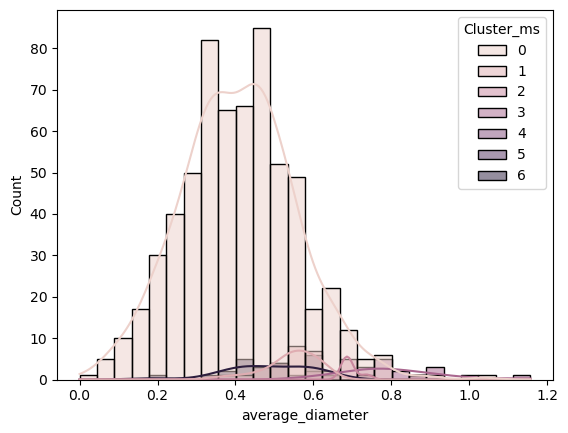

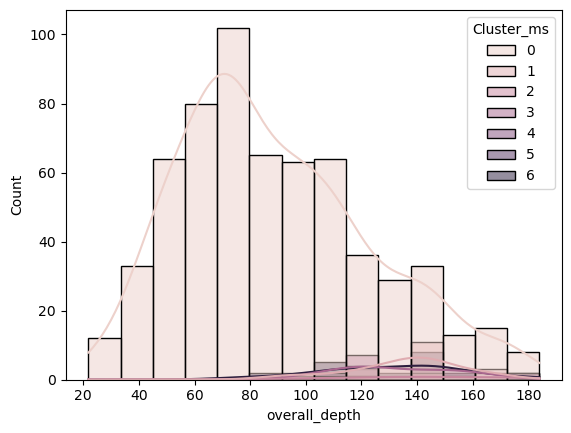

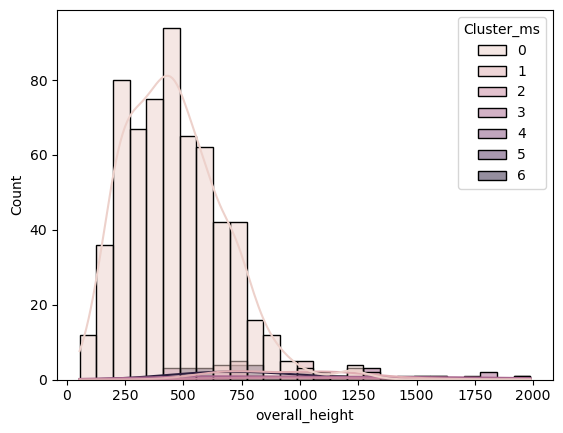

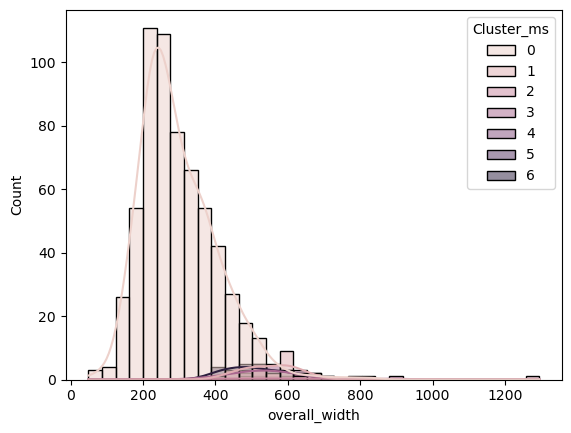

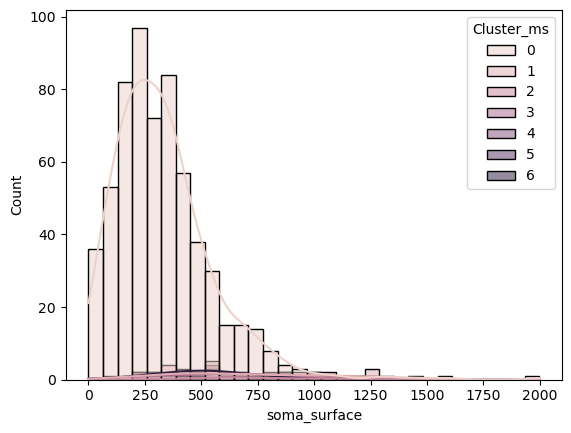

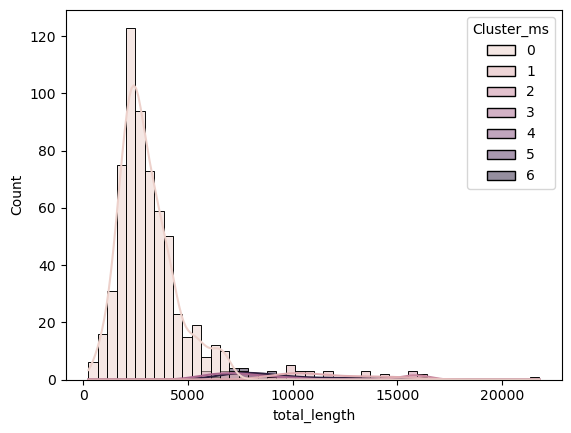

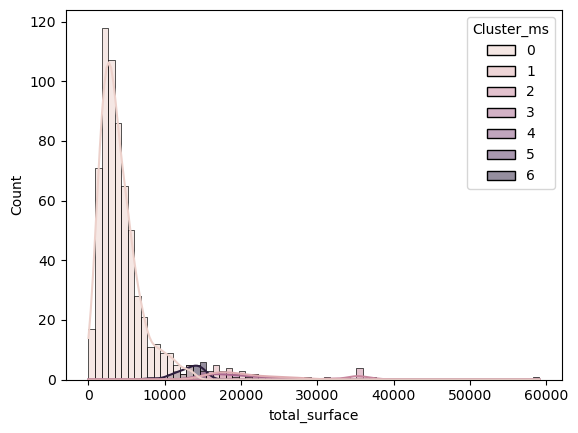

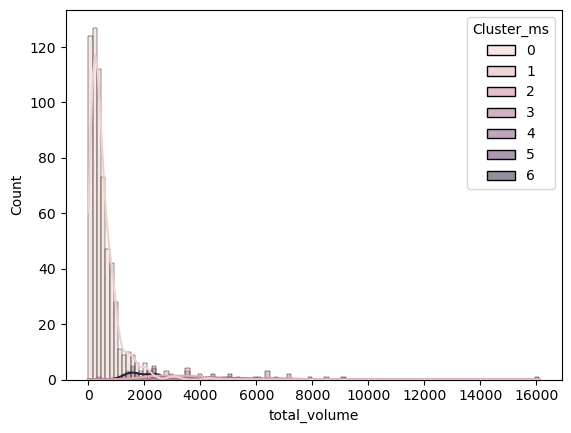

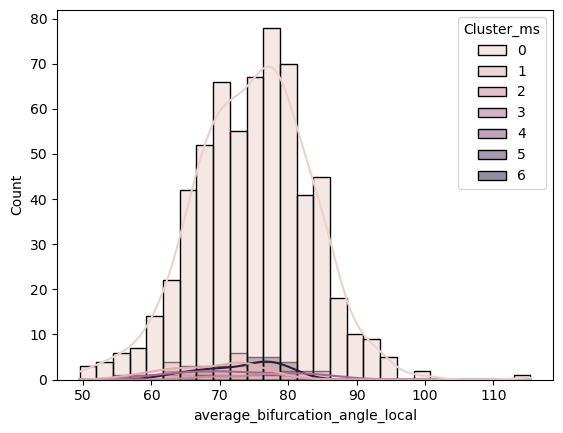

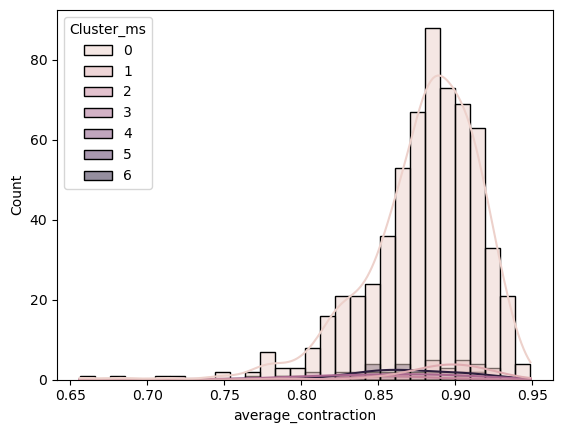

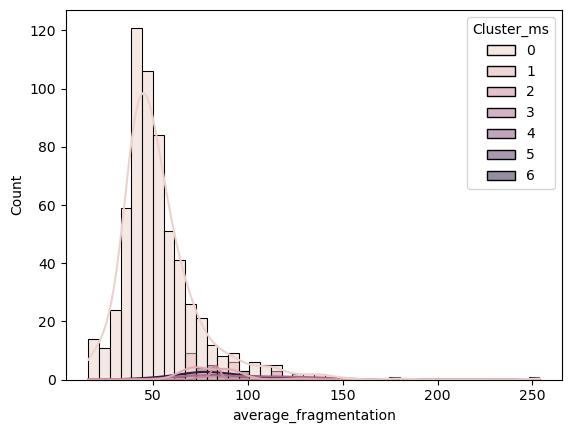

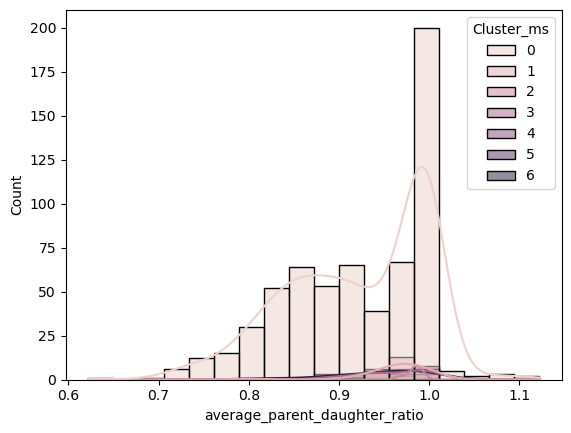

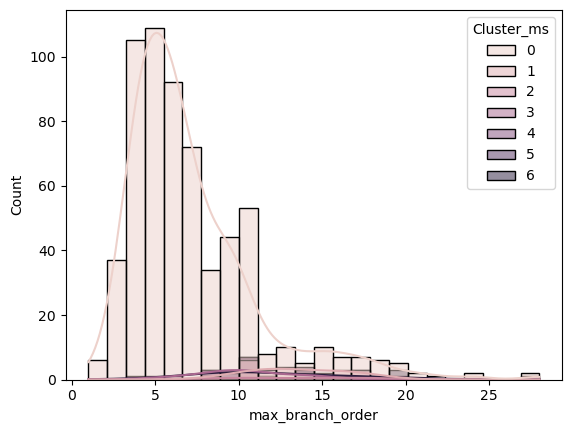

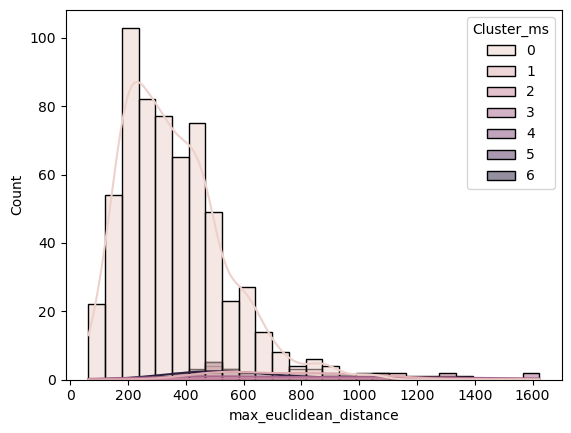

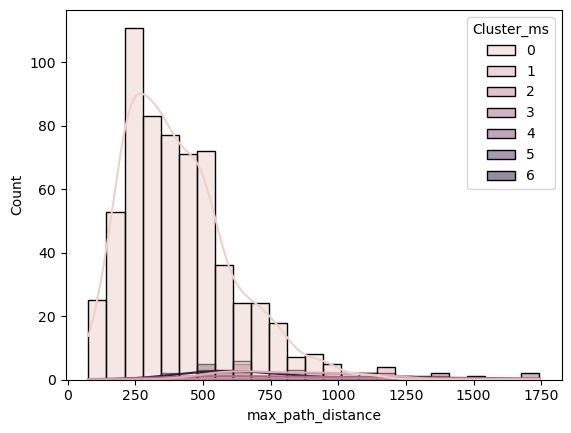

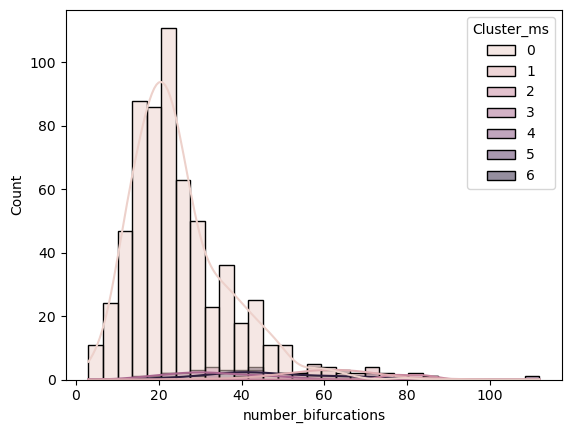

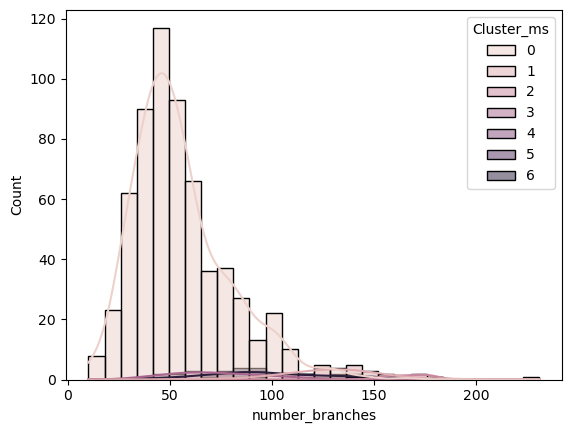

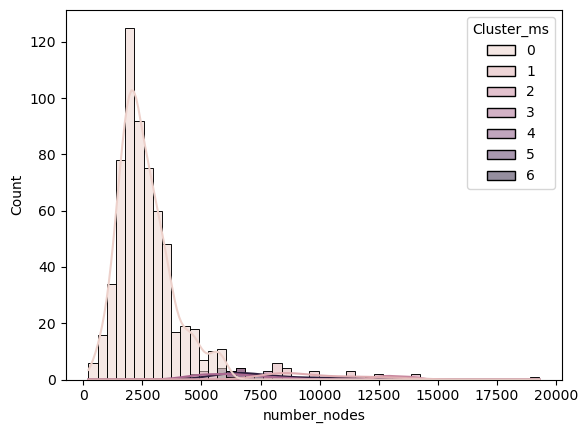

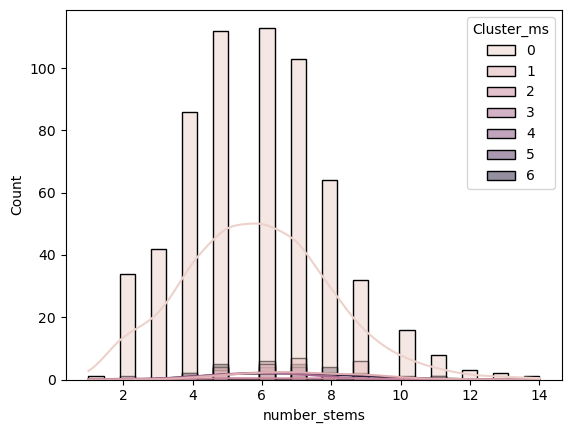

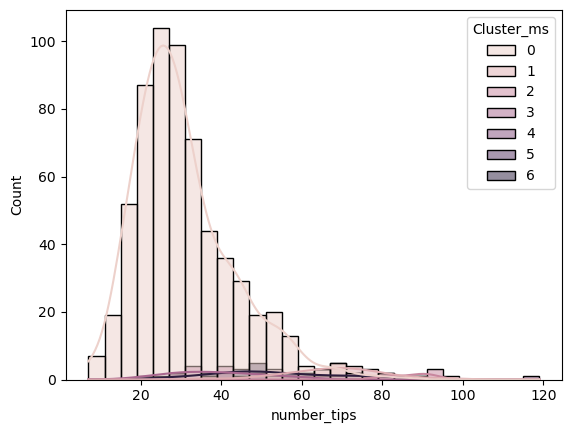

In [62]:
for column in combined_neurons_numeric.drop(["Cluster","Cluster_ms"],axis=1).columns:
        sns.histplot(data=combined_neurons_numeric, x=column,hue="Cluster_ms", kde = True,color='pink')
        plt.show()

* ***We can see the data is distributed into 7 clusters using the mean-shift clustering algorithm.***
* ***total length, total surface, total volume and number of nodes are the most discriminatory variables.***

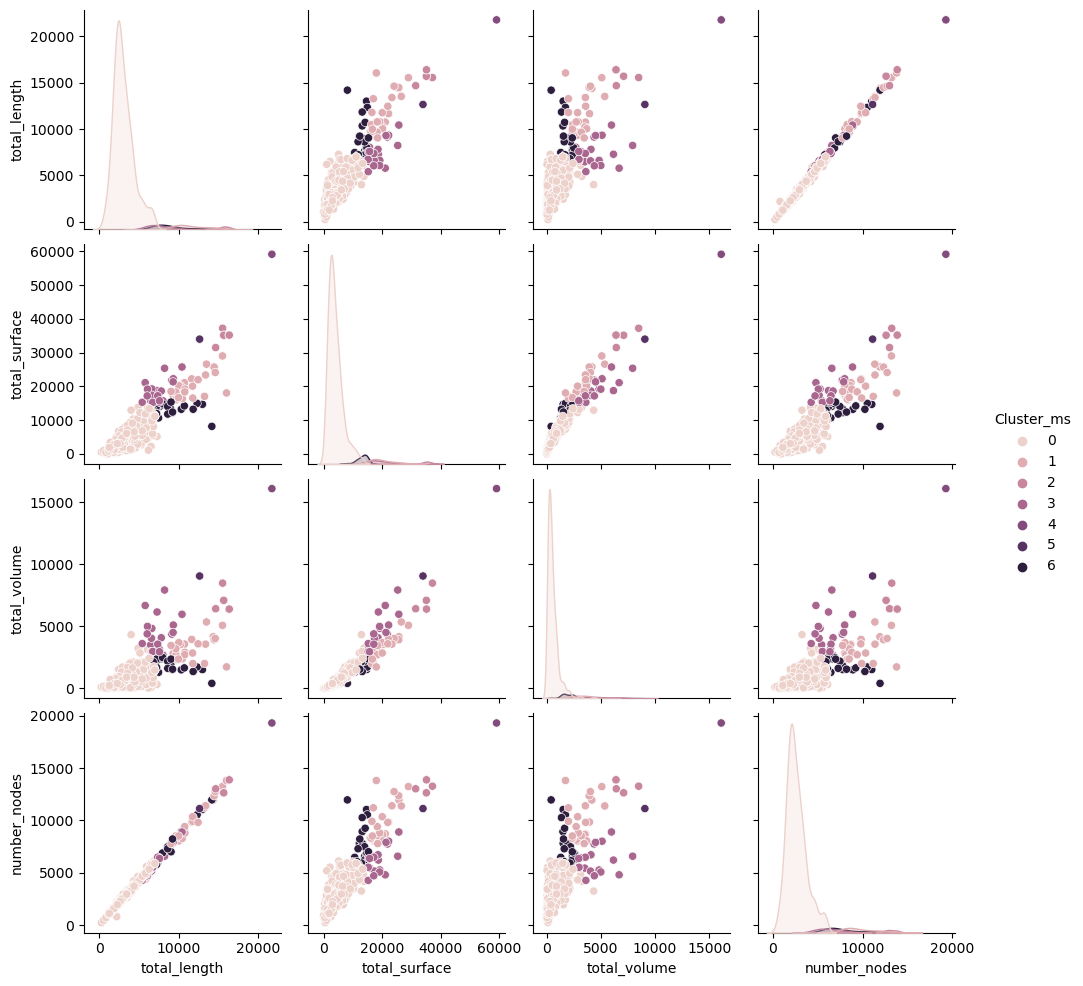

In [63]:
sns.pairplot(data=combined_neurons_numeric[['total_length', 'total_surface', 'total_volume', 'number_nodes', 'Cluster_ms']], hue='Cluster_ms')

Some benefits of the Mean-Shift clustering algorithm include the following:
 * There are no model assumptions that must be made, unlike in K-means or Gaussian mixture.
 * Additionally, it can simulate complex clusters with nonconvex shapes.
 * The bandwidth parameter, which calculates the number of clusters automatically, is the only one required.
 * No local minima problem exists, unlike in K-means.
 * No issue brought on by outliers.

The Mean-Shift clustering algorithm has the following drawbacks:
 * It performs poorly in cases of high dimension, where the number of clusters fluctuates quickly.
 * No direct control over number of clusters. There are some applications where a certain number of clusters is required.
 * It is unable to distinguish between significant and pointless modes.